Author: Johanes Paulus Bernard Purek | April-May 2025

# **MARKETING ANALYTICS BY SEGMENTING & PREDICTING CUSTOMER BEHAVIOUR**

**Problem Background**

iFood, a leading food delivery service in Brazil and Colombia, is facing challenges in maintaining profit growth despite strong revenue figures. With a large customer base and diverse product offerings across multiple channels (physical stores, website, and catalogs), the company is exploring strategic initiatives to boost marketing effectiveness. One of the key strategies is to leverage data analytics to improve the targeting and performance of marketing campaigns, thus maximizing customer value and increasing conversion rates.

**Goals and Objective**

1. Segment customers into distinct groups based on demographics, behavior, and preferences to allow for targeted and personalized marketing strategies.

2. Build a classification model that predicts the likelihood of a customer responding positively to future marketing campaigns.

3. Use insights from segmentation and predictions to optimize the selection of target customers for upcoming campaigns.

4. Enable the marketing team to make strategic decisions based on analytical results to improve ROI on campaigns.

**Actions and Metrics**

1. Data Exploration & Preprocessing: Clean, transform, and visualize data to uncover customer behavior and campaign response patterns.
Metric: Completeness and clarity of preprocessed data.

2. Model Development & Evaluation: Perform customer segmentation and build predictive models (e.g., Logistic Regression, Random Forest) to forecast campaign response.  
Metric: Silhouette Score for clustering; Accuracy, Precision, Recall, and F1-score for classification.

3. Business Recommendations: Deliver data-driven strategies for customer targeting and campaign optimization.   
Metric: Relevance and potential business impact of insights.

# **Import Library**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

!pip install category_encoders
import category_encoders as ce
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import RobustScaler

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer

!pip install squarify
import squarify as sq

from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

import warnings
warnings.filterwarnings('ignore')

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 3.1 MB/s eta 0:00:00


# **Load Dataset**

In [ ]:
df_train = pd.read_csv("/content/sample_data/ifood_df.csv")
df_train.head()

Income  Kidhome  Teenhome  Recency  MntWines  MntFruits  MntMeatProducts  \
0  58138.0        0         0       58       635         88              546   
1  46344.0        1         1       38        11          1                6   
2  71613.0        0         0       26       426         49              127   
3  26646.0        1         0       26        11          4               20   
4  58293.0        1         0       94       173         43              118   

   MntFishProducts  MntSweetProducts  MntGoldProds  ...  marital_Together  \
0              172                88            88  ...                 0   
1                2                 1             6  ...                 0   
2              111                21            42  ...                 1   
3               10                 3             5  ...                 1   
4               46                27            15  ...                 0   

   marital_Widow  education_2n Cycle  education_Basic  education_Graduation  \
0              0                   0                0                     1   
1              0                   0                0                     1   
2              0                   0                0                     1   
3              0                   0                0                     1   
4              0                   0                0                     0   

   education_Master  education_PhD  MntTotal  MntRegularProds  \
0                 0              0      1529             1441   
1                 0              0        21               15   
2                 0              0       734              692   
3                 0              0        48               43   
4                 0              1       407              392   

   AcceptedCmpOverall  
0                   0  
1                   0  
2                   0  
3                   0  
4                   0  

[5 rows x 39 columns]

In [ ]:
df_train.shape

(2205, 39)

In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2205 entries, 0 to 2204
Data columns (total 39 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Income                2205 non-null   float64
 1   Kidhome               2205 non-null   int64  
 2   Teenhome              2205 non-null   int64  
 3   Recency               2205 non-null   int64  
 4   MntWines              2205 non-null   int64  
 5   MntFruits             2205 non-null   int64  
 6   MntMeatProducts       2205 non-null   int64  
 7   MntFishProducts       2205 non-null   int64  
 8   MntSweetProducts      2205 non-null   int64  
 9   MntGoldProds          2205 non-null   int64  
 10  NumDealsPurchases     2205 non-null   int64  
 11  NumWebPurchases       2205 non-null   int64  
 12  NumCatalogPurchases   2205 non-null   int64  
 13  NumStorePurchases     2205 non-null   int64  
 14  NumWebVisitsMonth     2205 non-null   int64  
 15  AcceptedCmp3         

This dataset contains 2205 data values with 39 columns. The data type is all numerical either with float(Income) or int(the remaining).

# **Data Interpretation & Preparation**

**Customer Profiles**:
- `Age`: Customer's age
- `marital_Divorced`: 1 if customer is divorced, 0 otherwise
- `marital_Widow`: 1 if customer is widow, 0 otherwise
- `marital_Single`: 1 if customer is single, 0 otherwise
- `marital_Married`: 1 if customer is married, 0 otherwise
- `marital_Together`: 1 if customer is together, 0 otherwise
- `education_Basic`: 1 if customer has primary education, 0 otherwise
- `education_2nCycle`: 1 if customer has secondary education, 0 otherwise
- `education_Graduation`: 1 if customer has bachelor's degree, 0 otherwise
- `education_Master`: 1 if customer has master's degree, 0 otherwise
- `education_PhD` : 1 if customer has doctoral's degree, 0 otherwise
- `Income`: Customer's yearly household income
- `Kidhome`: Number of children in customer's household
- `Teenhome`: Number of teenagers in customer's household
- `Customer_Days`: Number of days since registration as a customer
- `Recency`: Number of days since customer's last purchase
- `Complain`: 1 if customer complained in the last 2 years, 0 otherwise

**Product Preferences**:
- `MntWines`: Amount spent on wine in the last 2 years
- `MntFruits`: Amount spent on fruits in the last 2 years
- `MntMeatProducts`: Amount spent on meat in the last 2 years
- `MntFishProducts`: Amount spent on fish in the last 2 years
- `MntSweetProducts`: Amount spent on sweets in the last 2 years
- `MntGoldProds`: Amount spent on gold in the last 2 years
- `MntTotal`: Total amount spent on all the products

**Campaigns(Success or Failure)**:
- `NumDealsPurchases`: Number of purchases made with a discount
- `AcceptedCmp1`: 1 if customer accepted the offer in the 1st campaign, 0 otherwise
- `AcceptedCmp2`: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise
-`AcceptedCmp3`: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
- `AcceptedCmp4`: 1 if customer accepted the offer in the 4th campaign, 0 otherwise
- `AcceptedCmp5`: 1 if customer accepted the offer in the 5th campaign, 0 otherwise
- `Response`: 1 if customer accepted the offer in the last campaign, 0 otherwise

**Channel Performance(Online or Offline)**:
- `NumWebPurchases`: Number of purchases made through the company's web site
- `NumCatalogPurchases`: Number of purchases made using a catalogue
- `NumStorePurchases`: Number of purchases made directly in stores
- `NumWebVisitsMonth`: Number of visits to company's web site in the last month

In [ ]:
df_train.describe()

Income      Kidhome     Teenhome      Recency     MntWines  \
count    2205.000000  2205.000000  2205.000000  2205.000000  2205.000000   
mean    51622.094785     0.442177     0.506576    49.009070   306.164626   
std     20713.063826     0.537132     0.544380    28.932111   337.493839   
min      1730.000000     0.000000     0.000000     0.000000     0.000000   
25%     35196.000000     0.000000     0.000000    24.000000    24.000000   
50%     51287.000000     0.000000     0.000000    49.000000   178.000000   
75%     68281.000000     1.000000     1.000000    74.000000   507.000000   
max    113734.000000     2.000000     2.000000    99.000000  1493.000000   

         MntFruits  MntMeatProducts  MntFishProducts  MntSweetProducts  \
count  2205.000000      2205.000000      2205.000000       2205.000000   
mean     26.403175       165.312018        37.756463         27.128345   
std      39.784484       217.784507        54.824635         41.130468   
min       0.000000         0.000000         0.000000          0.000000   
25%       2.000000        16.000000         3.000000          1.000000   
50%       8.000000        68.000000        12.000000          8.000000   
75%      33.000000       232.000000        50.000000         34.000000   
max     199.000000      1725.000000       259.000000        262.000000   

       MntGoldProds  ...  marital_Together  marital_Widow  education_2n Cycle  \
count   2205.000000  ...       2205.000000    2205.000000         2205.000000   
mean      44.057143  ...          0.257596       0.034467            0.089796   
std       51.736211  ...          0.437410       0.182467            0.285954   
min        0.000000  ...          0.000000       0.000000            0.000000   
25%        9.000000  ...          0.000000       0.000000            0.000000   
50%       25.000000  ...          0.000000       0.000000            0.000000   
75%       56.000000  ...          1.000000       0.000000            0.000000   
max      321.000000  ...          1.000000       1.000000            1.000000   

       education_Basic  education_Graduation  education_Master  education_PhD  \
count      2205.000000           2205.000000       2205.000000    2205.000000   
mean          0.024490              0.504762          0.165079       0.215873   
std           0.154599              0.500091          0.371336       0.411520   
min           0.000000              0.000000          0.000000       0.000000   
25%           0.000000              0.000000          0.000000       0.000000   
50%           0.000000              1.000000          0.000000       0.000000   
75%           0.000000              1.000000          0.000000       0.000000   
max           1.000000              1.000000          1.000000       1.000000   

          MntTotal  MntRegularProds  AcceptedCmpOverall  
count  2205.000000      2205.000000          2205.00000  
mean    562.764626       518.707483             0.29932  
std     575.936911       553.847248             0.68044  
min       4.000000      -283.000000             0.00000  
25%      56.000000        42.000000             0.00000  
50%     343.000000       288.000000             0.00000  
75%     964.000000       884.000000             0.00000  
max    2491.000000      2458.000000             4.00000  

[8 rows x 39 columns]

All numeric columns — such as Kidhome, Teenhome, Income, Recency, MntWines, MntFruits, etc. contain valid minimum and maximum values, indicating that the data ranges are logically consistent and appropriate for analysis.

1. For example, Kidhome has a minimum value of 0 and a maximum of 2. These values are reasonable, as it is common for a household to have no children or up to two children.

2. In the case of Income, the values range from a positive minimum to a maximum of $113,734. This is acceptable since customers typically require income to make purchases, and the upper bound represents a plausible annual income.

In [ ]:
print(df_train['Response'].value_counts())

percentage = df_train['Response'].value_counts(normalize=True) * 100
print(percentage)

Response
0    1872
1     333
Name: count, dtype: int64
Response
0    84.897959
1    15.102041
Name: proportion, dtype: float64


Around 15% only from the customers that accepted the offer in the last campaign

In [ ]:
print(df_train['Complain'].value_counts())

percentage = df_train['Complain'].value_counts(normalize=True) * 100
print(percentage)

Complain
0    2185
1      20
Name: count, dtype: int64
Complain
0    99.092971
1     0.907029
Name: proportion, dtype: float64


Less than 1% of customers who made a complain in the last 2 years.

In [ ]:
df_train.sample(10)

Income  Kidhome  Teenhome  Recency  MntWines  MntFruits  \
1930  29478.0        1         0       59         8          0   
447   33183.0        1         0       46         7          5   
774   46524.0        0         1       70        31         19   
1435  64866.0        0         1        9       508          5   
521   57247.0        0         1       50        99          4   
805   78353.0        0         1       51       752        122   
1740  36802.0        1         0       23        16          1   
297   22574.0        2         1       28        25          0   
972   42021.0        1         0       34       393          5   
587   49618.0        1         1       77        80          3   

      MntMeatProducts  MntFishProducts  MntSweetProducts  MntGoldProds  ...  \
1930                7                3                 1             1  ...   
447                39               17                15            37  ...   
774                35               26                14            52  ...   
1435               21                7                 5            10  ...   
521                32               37                54             6  ...   
805               476               39               153            34  ...   
1740                2                0                 0             1  ...   
297                 8                2                 0             2  ...   
972               136                7                 5            27  ...   
587                26                4                 2            14  ...   

      marital_Together  marital_Widow  education_2n Cycle  education_Basic  \
1930                 1              0                   0                0   
447                  0              0                   0                0   
774                  0              0                   0                0   
1435                 0              1                   0                0   
521                  1              0                   1                0   
805                  0              0                   1                0   
1740                 0              0                   0                0   
297                  0              0                   0                0   
972                  1              0                   0                0   
587                  1              0                   0                0   

      education_Graduation  education_Master  education_PhD  MntTotal  \
1930                     1                 0              0        19   
447                      1                 0              0        83   
774                      1                 0              0       125   
1435                     0                 1              0       546   
521                      0                 0              0       226   
805                      0                 0              0      1542   
1740                     0                 0              1        19   
297                      1                 0              0        35   
972                      0                 1              0       546   
587                      0                 1              0       115   

      MntRegularProds  AcceptedCmpOverall  
1930               18                   0  
447                46                   0  
774                73                   0  
1435              536                   1  
521               220                   0  
805              1508                   0  
1740               18                   0  
297                33                   0  
972               519                   1  
587               101                   0  

[10 rows x 39 columns]

In [ ]:
df_train.nunique()

Income                  1963
Kidhome                    3
Teenhome                   3
Recency                  100
MntWines                 775
MntFruits                158
MntMeatProducts          551
MntFishProducts          182
MntSweetProducts         176
MntGoldProds             212
NumDealsPurchases         15
NumWebPurchases           15
NumCatalogPurchases       13
NumStorePurchases         14
NumWebVisitsMonth         16
AcceptedCmp3               2
AcceptedCmp4               2
AcceptedCmp5               2
AcceptedCmp1               2
AcceptedCmp2               2
Complain                   2
Z_CostContact              1
Z_Revenue                  1
Response                   2
Age                       56
Customer_Days            662
marital_Divorced           2
marital_Married            2
marital_Single             2
marital_Together           2
marital_Widow              2
education_2n Cycle         2
education_Basic            2
education_Graduation       2
education_Master           2
education_PhD              2
MntTotal                 897
MntRegularProds          974
AcceptedCmpOverall         5
dtype: int64

I will remove the `Z_CostContact` & `Z_Revenue` column since both of them only has 1 unique value, and it won't be help in understanding customer choices.

In [ ]:
df_train.drop(columns=['Z_CostContact', 'Z_Revenue'], axis=1, inplace=True)

By looking at the other's remaining column unique value above and see the correlation between columns, there are some of the column that can be transformed in order to reduce the column size and to enrich the unique value for a transformed column.

In [ ]:
# Kidhome and Teenhome can be added and assign it into Dependents
df_train['Dependents'] = df_train['Kidhome'] + df_train['Teenhome']

In [ ]:
# Then will be transformed into binary value to check if the Dependents greater than 0
df_train['Has_Dependent'] = np.where(df_train.Dependents > 0, 1, 0)

In [ ]:
# Channel performance will be added from 3 purchases column so i can use it as a frequency in RFM analysis
df_train['NumTotalPurchases'] = df_train['NumWebPurchases'] + df_train['NumCatalogPurchases'] + df_train['NumStorePurchases']

In [ ]:
# Next assign for the marital status to make the value status more simple
def marital_status(row):
    if row['marital_Divorced'] == 1:
        return 'Divorced'
    elif row['marital_Married'] == 1:
        return 'Married'
    elif row['marital_Single'] == 1:
        return 'Single'
    elif row['marital_Together'] == 1:
        return 'Together'
    elif row['marital_Widow'] == 1:
        return 'Widow'
    else:
        return 'Unknown'

df_train['Marital'] = df_train.apply(marital_status, axis=1)

In [ ]:
# Also with the live with status
def live_with(row):
    if row['marital_Married'] == 1:
        return 1
    elif row['marital_Together'] == 1:
        return 1
    else:
        return 0

df_train['LiveWith'] = df_train.apply(live_with, axis=1)

In [ ]:
# The education will also be transformed to make the value status more simple
def education_status(row):
    if row['education_Basic'] == 1:
        return 'Primary'
    elif row['education_2n Cycle'] == 1:
        return 'Secondary'
    elif row['education_Graduation'] == 1:
        return 'Bachelor'
    elif row['education_Master'] == 1:
        return 'Master'
    elif row['education_PhD'] == 1:
        return 'Doctoral'
    else:
        return 'Unknown'

df_train['Education'] = df_train.apply(education_status, axis=1)

In [ ]:
# Transform also the customers who has graduated from college
def has_degree(row):
    if row['education_Graduation'] == 1:
        return 1
    elif row['education_Master'] == 1:
        return 1
    elif row['education_PhD'] == 1:
        return 1
    else:
        return 0

df_train['Has_Degree'] = df_train.apply(has_degree, axis=1)

In [ ]:
df_train[['Dependents','Has_Dependent', 'NumTotalPurchases', 'Marital', 'LiveWith', 'Education', 'Has_Degree']].head()

Dependents  Has_Dependent  NumTotalPurchases   Marital  LiveWith Education  \
0           0              0                 22    Single         0  Bachelor   
1           2              1                  4    Single         0  Bachelor   
2           0              0                 20  Together         1  Bachelor   
3           1              1                  6  Together         1  Bachelor   
4           1              1                 14   Married         1  Doctoral   

   Has_Degree  
0           1  
1           1  
2           1  
3           1  
4           1

In [ ]:
# Next, also transform the IsRetented column by adding Overall Accepted Campaign and its Response and check if it's greater than 1
IsRetented = []

for AcceptedCmpOverall, Response in zip(df_train['AcceptedCmpOverall'], df_train['Response']):
    if (AcceptedCmpOverall + Response) > 1:
        IsRetented.append(1)
    else:
        IsRetented.append(0)

df_train['IsRetented'] = IsRetented

In [ ]:
df_train[["AcceptedCmpOverall", "Response", "IsRetented"]].sample(3)

AcceptedCmpOverall  Response  IsRetented
577                    0         0           0
1617                   0         0           0
1990                   0         1           0

# **Check Missing & Duplicated Values**

In [ ]:
print('Any Missing Values? :', df_train.isnull().values.any())

missing_value_perc = (df_train.isnull().sum()/df_train.shape[0]) * 100
missing_value_perc

Any Missing Values? : False


Income                  0.0
Kidhome                 0.0
Teenhome                0.0
Recency                 0.0
MntWines                0.0
MntFruits               0.0
MntMeatProducts         0.0
MntFishProducts         0.0
MntSweetProducts        0.0
MntGoldProds            0.0
NumDealsPurchases       0.0
NumWebPurchases         0.0
NumCatalogPurchases     0.0
NumStorePurchases       0.0
NumWebVisitsMonth       0.0
AcceptedCmp3            0.0
AcceptedCmp4            0.0
AcceptedCmp5            0.0
AcceptedCmp1            0.0
AcceptedCmp2            0.0
Complain                0.0
Response                0.0
Age                     0.0
Customer_Days           0.0
marital_Divorced        0.0
marital_Married         0.0
marital_Single          0.0
marital_Together        0.0
marital_Widow           0.0
education_2n Cycle      0.0
education_Basic         0.0
education_Graduation    0.0
education_Master        0.0
education_PhD           0.0
MntTotal                0.0
MntRegularProds         0.0
AcceptedCmpOverall      0.0
Dependents              0.0
Has_Dependent           0.0
NumTotalPurchases       0.0
Marital                 0.0
LiveWith                0.0
Education               0.0
Has_Degree              0.0
IsRetented              0.0
dtype: float64

There's no missing values.

In [ ]:
print(df_train.duplicated().sum())

percentage = (df_train.duplicated().sum() / len(df_train)) * 100
print(f"Percentage of duplicated values is: {percentage:.2f}%")

184
Percentage of duplicated values is: 8.34%


Since, it's only 184 duplicated values with about less than 9%, the duplicated value will be dropped to maintain the natural data.

In [ ]:
df_train = df_train.drop_duplicates()

print('Number of duplicated data is:', df_train.duplicated().sum())

Number of duplicated data is: 0


# **Check Outliers**

Checking the outliers based on the categorization that have been done in the Data Interpretation section, unless for the Campaigns part. The purpose if for the RFM analysis by focusing on some column that will be checked it outliers below to make sure that the outliers won't make any significant effect into the RFM's analysis.

In [ ]:
df_train_profile = pd.DataFrame(df_train, columns=['Age',
                                 'Income',
                                 'Kidhome',
                                 'Teenhome',
                                 'Customer_Days',
                                  'Recency'])
df_train_profile.sample()

Age   Income  Kidhome  Teenhome  Customer_Days  Recency
699   62  45160.0        1         1           2251        9

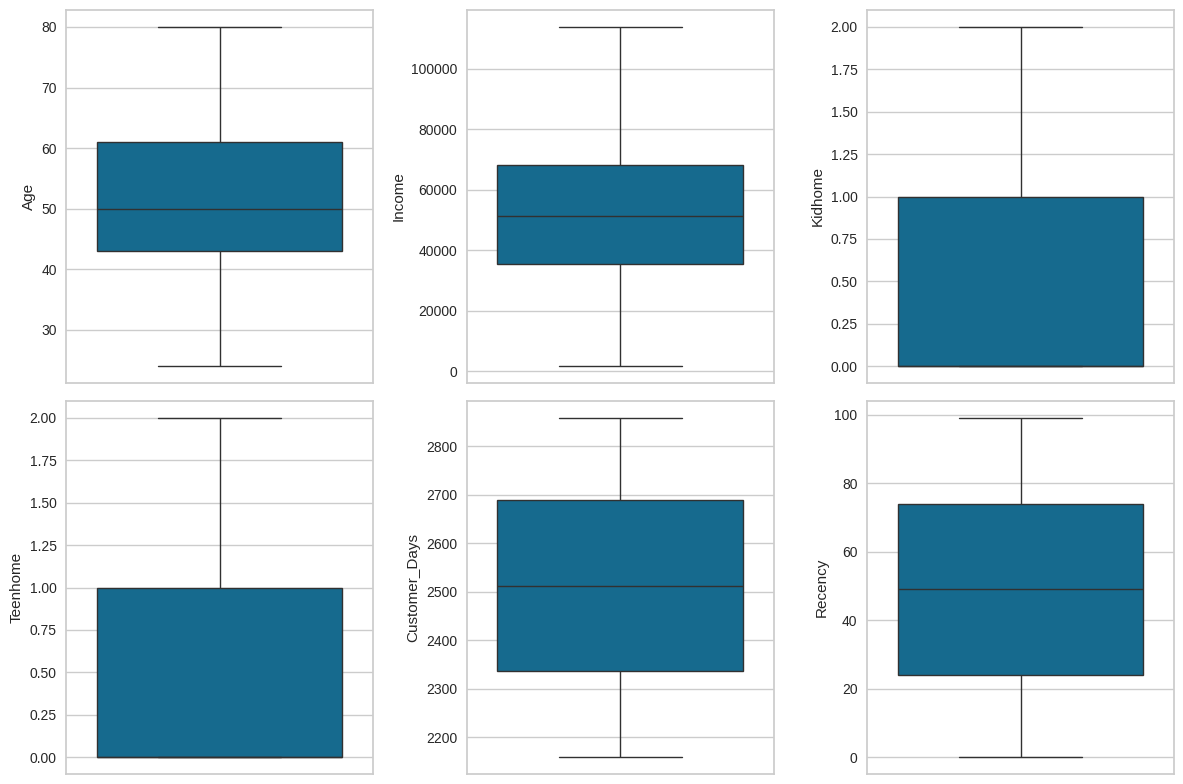

In [ ]:
fig = plt.figure(figsize=(12,8))

for i in range(len(df_train_profile.columns)):
    fig.add_subplot(2,3,i+1)
    sns.boxplot(y=df_train_profile.iloc[:,i])

plt.tight_layout()
plt.show()

For the Customer Profiles part, based on the box plot above can be seen that there is not significant outlier for each of the column.

In [ ]:
df_train_product = pd.DataFrame(df_train, columns=['MntWines',
                             'MntFruits',
                             'MntMeatProducts',
                             'MntFishProducts',
                             'MntSweetProducts',
                             'MntGoldProds',
                             'MntTotal'])
df_train_product.sample()

MntWines  MntFruits  MntMeatProducts  MntFishProducts  MntSweetProducts  \
1184       291         10              689               84                10   

      MntGoldProds  MntTotal  
1184             0      1084

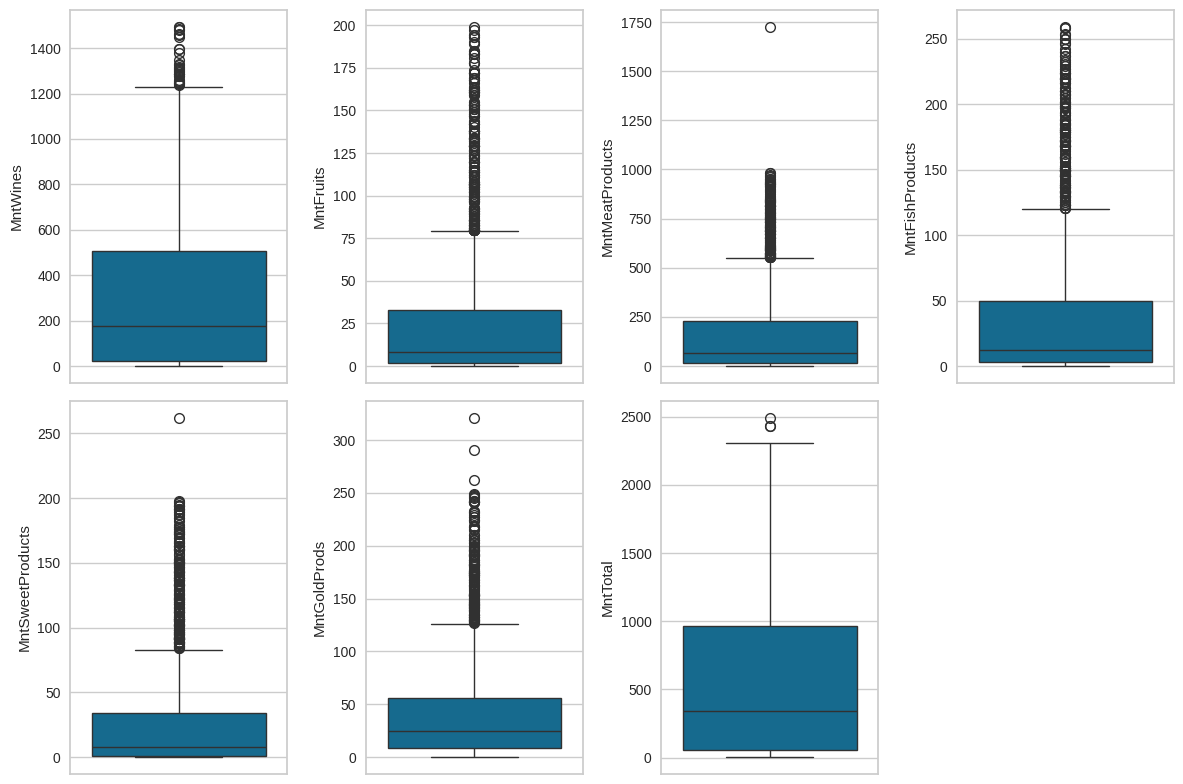

In [ ]:
fig = plt.figure(figsize=(12, 8))

for i in range(len(df_train_product.columns)):
    fig.add_subplot(2,4,i+1)
    sns.boxplot(y=df_train_product.iloc[:,i])

plt.tight_layout()
plt.show()

From the boxplot above, it can be seen that there are some outliers for each of the column. But, if talking to interpret about Amount context, there's tend to have a natural condition for each of the customers because for some customers may purchase the product based on their favoritism and preferences like they may like fruits, meat&fish, or maybe have a very sweet teeth. So, it will not be drop as i'm trying to keep it as natural.

In [ ]:
df_train_channel = pd.DataFrame(df_train, columns=['NumWebPurchases',
                             'NumCatalogPurchases',
                             'NumStorePurchases',
                             'NumWebVisitsMonth'])
df_train_channel.sample()

NumWebPurchases  NumCatalogPurchases  NumStorePurchases  \
1380                3                    0                  4   

      NumWebVisitsMonth  
1380                  9

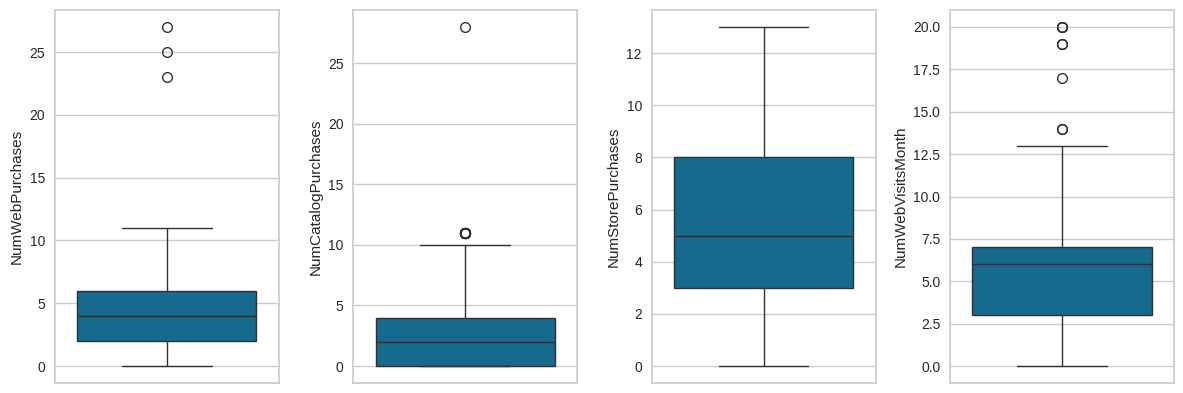

In [ ]:
fig = plt.figure(figsize=(12, 8))

for i in range(len(df_train_channel.columns)):
    fig.add_subplot(2,4,i+1)
    sns.boxplot(y=df_train_channel.iloc[:,i])

plt.tight_layout()
plt.show()

The boxplot above again showing that the 4 columns categorized in Channel Performance section don't have a very significant outliers.

# **Data Visualization**

In [ ]:
df_train_copy = df_train.copy()

In [ ]:
# Mapping all the column based on binary, amount, and channel
# except Age, Income, Dependents, Kidhome, Teenhome, Customer_Days, Recency for insight purpose
binary_cols = [col for col in df_train.columns if 'Accepted' in col] + ['Response', 'Complain']

mnt_cols = [col for col in df_train.columns if 'Mnt' in col]

channel_cols = [col for col in df_train.columns if 'Num' in col]

In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2021 entries, 0 to 2204
Data columns (total 45 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Income                2021 non-null   float64
 1   Kidhome               2021 non-null   int64  
 2   Teenhome              2021 non-null   int64  
 3   Recency               2021 non-null   int64  
 4   MntWines              2021 non-null   int64  
 5   MntFruits             2021 non-null   int64  
 6   MntMeatProducts       2021 non-null   int64  
 7   MntFishProducts       2021 non-null   int64  
 8   MntSweetProducts      2021 non-null   int64  
 9   MntGoldProds          2021 non-null   int64  
 10  NumDealsPurchases     2021 non-null   int64  
 11  NumWebPurchases       2021 non-null   int64  
 12  NumCatalogPurchases   2021 non-null   int64  
 13  NumStorePurchases     2021 non-null   int64  
 14  NumWebVisitsMonth     2021 non-null   int64  
 15  AcceptedCmp3          2021

**UNIVARIATE ANALYSIS**

**Customer Profiles Category**

In [ ]:
demographics = pd.DataFrame(round(df_train.drop(columns=binary_cols+mnt_cols+channel_cols).select_dtypes(include='number').mean(), 1), columns=['Average']).reindex([
    'Age', 'Customer_Days', 'Income', 'Dependents', 'Kidhome', 'Teenhome', 'Recency'])

demographics.T

Age  Customer_Days   Income  Dependents  Kidhome  Teenhome  Recency
Average  51.1         2511.6  51687.3         1.0      0.4       0.5     48.9

In [ ]:
years = 2511.6 / 365
years

6.8810958904109585

The average customer profiles is 51 years old, almost 7 years of became a customer, having income around $52.000 per year, got 1 dependent, and made a purchase from company in the last 49 days.

**Campaign Performance Category**

***Latest Campaign Perform***

In [ ]:
# Using df_train_copy for make a transformation on a column which is Response to get insight
decode_map = {0: "No", 1: "Yes"}
def decode_sentiment(label):
    return decode_map[int(label)]

df_train_copy['Response'] = df_train_copy['Response'].apply(lambda x: decode_sentiment(x))

In [ ]:
latest = df_train_copy.groupby('Response').size().reset_index()
latest.columns = ['Response','Amount']
latest['%'] = round(latest['Amount']*100/sum(latest['Amount']),2)
latest.sort_values(by='Amount', ascending=False)

Response  Amount      %
0       No    1710  84.61
1      Yes     311  15.39

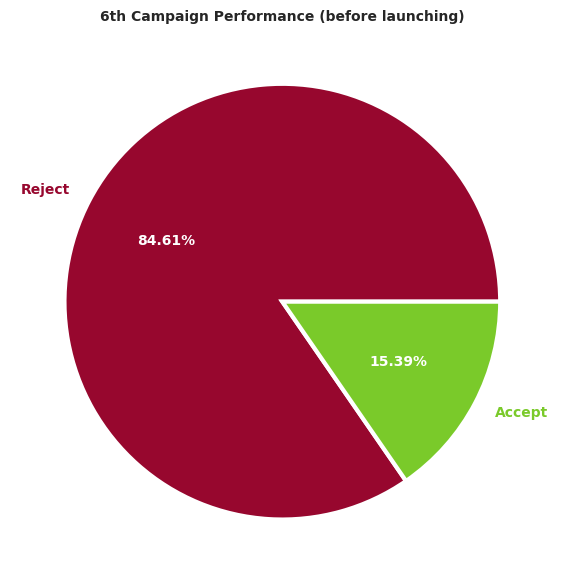

In [ ]:
sns.set_style('whitegrid')
labels = ['Reject', 'Accept']
colors = ["#97072e", "#7aca2a"]
sns.set_palette(sns.color_palette(colors))

fig, ax = plt.subplots(figsize=(6, 6))

patches, texts, pcts = plt.pie(latest['Amount'], labels=labels, autopct='%.2f%%',
        wedgeprops={'linewidth': 3.0, 'edgecolor': 'white'},
        textprops={'fontsize': 10})

for i, patch in enumerate(patches):
  texts[i].set_color(patch.get_facecolor())
plt.setp(pcts, color='white', fontweight=600)
plt.setp(texts, fontweight=600)
ax.set_title('6th Campaign Performance (before launching)', fontsize=10, fontweight='bold')
plt.tight_layout()

Around less than 16% of the customer sample accepted the offer in the 6th campaign before the products launching

***Previous 5 Campaign Perform***

In [ ]:
campaigns = pd.DataFrame(df_train.iloc[:,15:20].sum()).reset_index()
campaigns.columns = ['Campaign','Amount']
campaigns['%'] = round(campaigns['Amount']*100/sum(campaigns['Amount']),2)
campaigns = campaigns.sort_values(by='Campaign', ascending=True)
campaigns

Campaign  Amount      %
3  AcceptedCmp1     133  21.77
4  AcceptedCmp2      26   4.26
0  AcceptedCmp3     151  24.71
1  AcceptedCmp4     155  25.37
2  AcceptedCmp5     146  23.90

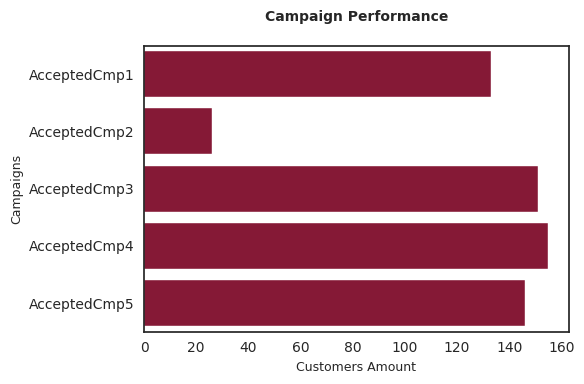

In [ ]:
plt.figure(figsize=(6,4))
sns.set_style('white')

sns.barplot(campaigns, y='Campaign', x= 'Amount')
plt.title('Campaign Performance\n', fontsize=10, fontweight='bold')
plt.xlabel('Customers Amount', fontsize=9)
plt.ylabel('Campaigns', fontsize=9)
plt.tight_layout()

- Campaign 4 stood out as the most successful, with 155 customers in the sample accepting the offer.
- In contrast, Campaign 2 had the lowest response, with only 26 customers accepting the offer.

In [ ]:
retention_df = df_train['IsRetented'].value_counts().reset_index()
retention_df.columns = ['Retention Status', 'Count']
retention_df['Retention Status'] = retention_df['Retention Status'].map({True: 'Retained', False: 'Converted Only'})
retention_df['%'] = round(retention_df['Count'] * 100 / retention_df['Count'].sum(), 2)
retention_df

Retention Status  Count      %
0              NaN   1802  89.16
1              NaN    219  10.84

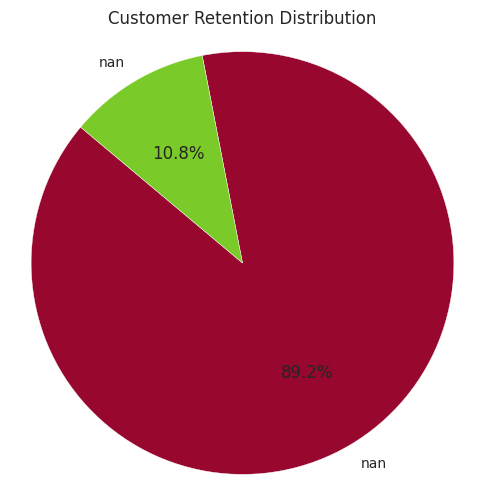

In [ ]:
colors = ["#97072e", "#7aca2a"]
plt.figure(figsize=(6, 6))
plt.pie(retention_df['Count'], labels=retention_df['Retention Status'], autopct='%1.1f%%', colors=colors, startangle=140)
plt.title('Customer Retention Distribution')
plt.axis('equal')
plt.show()

- A total of 219 customers were successfully retained out of 344 who initially converted.

***Products Revenue***

In [ ]:
rev = pd.DataFrame(df_train.iloc[:,4:10].sum()).reset_index()
rev.columns = ['Products','Revenue']
rev['%'] = round(rev['Revenue']*100/sum(rev['Revenue']),2)
rev = rev.sort_values(by='Revenue', ascending=False)
rev

Products  Revenue      %
0          MntWines   619421  50.43
2   MntMeatProducts   335607  27.33
5      MntGoldProds    88766   7.23
3   MntFishProducts    75997   6.19
4  MntSweetProducts    55110   4.49
1         MntFruits    53283   4.34

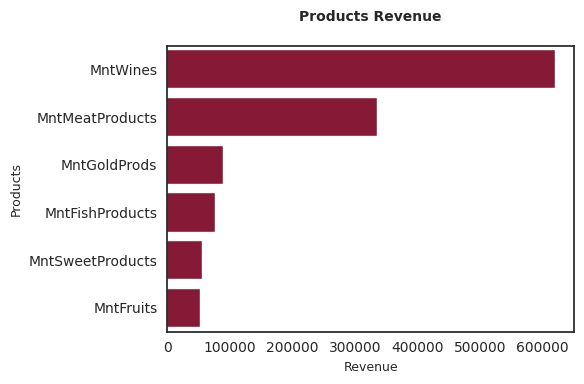

In [ ]:
plt.figure(figsize=(6,4))
sns.set_style('white')

sns.barplot(rev, y='Products', x= 'Revenue')
plt.title('Products Revenue\n', fontsize=10, fontweight='bold')
plt.xlabel('Revenue', fontsize=9)
plt.ylabel('Products', fontsize=9)
plt.tight_layout()

- Wine is the top revenue-generating product, accounting for around 51% of the company's total earnings.

**Channel Performance Category**

In [ ]:
channel = pd.DataFrame(df_train.iloc[:,11:14].sum()).reset_index()
channel.columns = ['Channel','Amount']
channel['%'] = round(channel['Amount']*100/sum(channel['Amount']),2)
channel = channel.sort_values(by='Amount', ascending=False)
channel

Channel  Amount      %
2    NumStorePurchases   11737  46.21
0      NumWebPurchases    8317  32.75
1  NumCatalogPurchases    5345  21.04

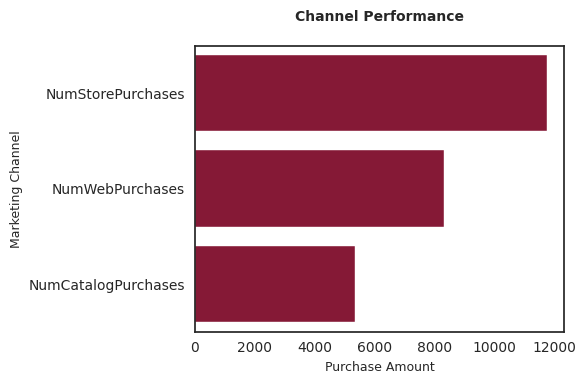

In [ ]:
plt.figure(figsize=(6,4))
sns.set_style('white')

sns.barplot(channel, y='Channel', x= 'Amount')
plt.title('Channel Performance\n', fontsize=10, fontweight='bold')
plt.xlabel('Purchase Amount', fontsize=9)
plt.ylabel('Marketing Channel', fontsize=9)
plt.tight_layout()

- The store channel accounts for the highest number of purchases, contributing 46% of the total orders.

**BIVARIATE ANALYSIS**

***Relationship Between Total Dependents and Total Amount Spent(Monetary)***

In [ ]:
grouping = df_train.groupby('Dependents')['MntTotal'].sum().reset_index()
grouping.columns = ['Total Dependents','Total Amount Spent']
grouping

Total Dependents  Total Amount Spent
0                 0              598912
1                 1              444416
2                 2               85288
3                 3               10802

<Figure size 600x400 with 0 Axes>

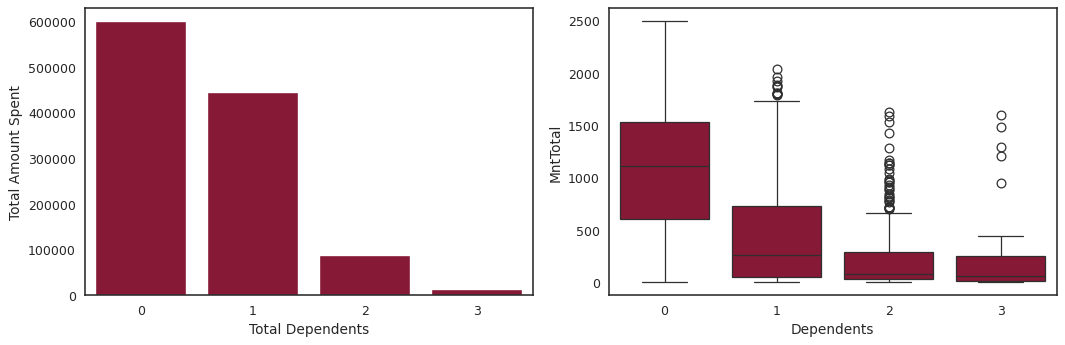

In [ ]:
plt.figure(figsize=(6,4))
sns.set_style('white')

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12,4), dpi=90)

sns.barplot(grouping, x='Total Dependents', y= 'Total Amount Spent', ax=ax1)
sns.boxplot(df_train, x='Dependents', y='MntTotal', ax=ax2)

plt.tight_layout()
plt.show()

- Customers without dependents tend to spend more, and spending gradually declines as the number of dependents increases.

In [ ]:
print("{} effect of variable on total amount spent : \n".format('Total dependent'))
print(df_train.groupby('Dependents')["MntTotal"].mean().sort_values(ascending=False))

Total dependent effect of variable on total amount spent : 

Dependents
0    1056.282187
1     432.732230
3     240.044444
2     223.267016
Name: MntTotal, dtype: float64


- Average amount of money spent by customers without dependents is about 1056 dollars, followed by 432 dollars with 1 dependent. There's a little difference between customers who have 2 and 3 dependents.

***Relationship Between Total Dependents and Total Purchases(Frequency)***

In [ ]:
grouping = df_train.groupby('Dependents')['NumTotalPurchases'].sum().reset_index()
grouping.columns = ['Total Dependents','Num of Total Purchases']
grouping

Total Dependents  Num of Total Purchases
0                 0                    9408
1                 1                   12347
2                 2                    3312
3                 3                     332

<Figure size 600x400 with 0 Axes>

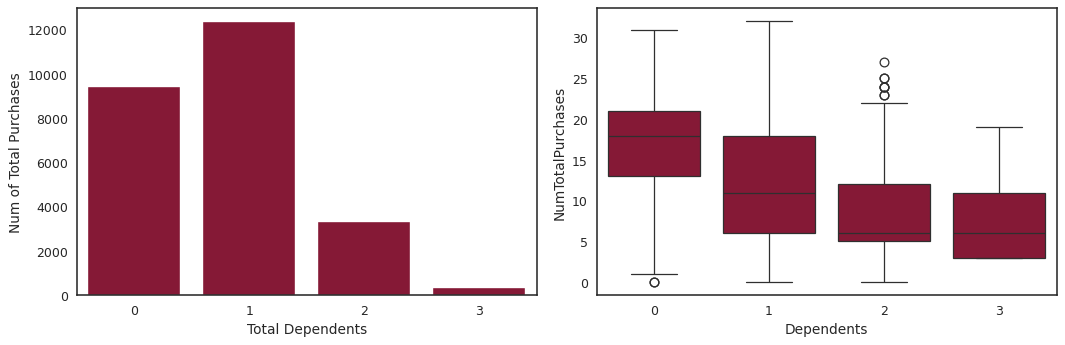

In [ ]:
plt.figure(figsize=(6,4))
sns.set_style('white')

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12,4), dpi=90)

sns.barplot(grouping, x='Total Dependents', y= 'Num of Total Purchases', ax=ax1)
sns.boxplot(df_train, x='Dependents', y='NumTotalPurchases', ax=ax2)

plt.tight_layout()
plt.show()

- Customers with one dependent contribute the highest total purchases, followed by those with no dependents, with spending gradually declining as the number of dependents rises.

In [ ]:
print("{} effect of variable on total purchases: \n".format('Total dependent'))
print(df_train.groupby('Dependents')['NumTotalPurchases'].mean().sort_values(ascending=False))

Total dependent effect of variable on total purchases: 

Dependents
0    16.592593
1    12.022395
2     8.670157
3     7.377778
Name: NumTotalPurchases, dtype: float64


- In terms of average purchases, customers without dependents lead with an average of 16 to 17 purchases.

***Relationship Between Income and Education***

In [ ]:
grouping = df_train.groupby('Education')['Income'].sum().reset_index()
grouping

Education      Income
0   Bachelor  52933023.0
1   Doctoral  24133240.0
2     Master  17709635.0
3    Primary    975754.0
4  Secondary   8708298.0

<Figure size 600x400 with 0 Axes>

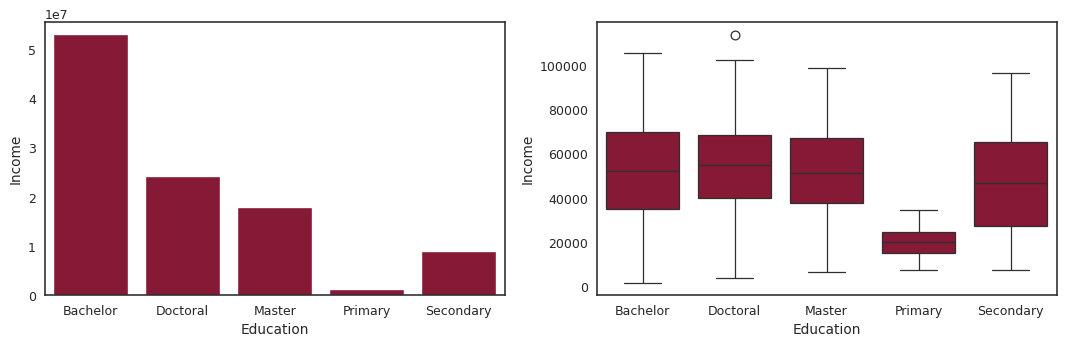

In [ ]:
plt.figure(figsize=(6,4))
sns.set_style('white')

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12,4), dpi=90)

sns.barplot(grouping, x='Education', y= 'Income', ax=ax1)
sns.boxplot(df_train, x='Education', y='Income', ax=ax2)

plt.tight_layout()
plt.show()

- Customers who hold the bachelor degree have the highest sum of income. But, i have to check the average to avoid bias.

In [ ]:
print("{} effect of variable on income: \n".format('Education'))
print(df_train.groupby('Education')['Income'].mean().sort_values(ascending=False))

Education effect of variable on income: 

Education
Doctoral     54973.211845
Master       52864.582090
Bachelor     52150.761576
Secondary    47586.327869
Primary      19913.346939
Name: Income, dtype: float64


So, the customers who hold the doctoral degree have the highest average income which indicate that the high someone's degree is, the highest income will be get.

***Relationship Between Income and HasDependent***

In [ ]:
grouping = df_train.groupby('Has_Dependent')['Income'].sum().reset_index()
grouping.columns = ['Has Dependent','Income']
grouping

Has Dependent      Income
0              0  37226365.0
1              1  67233585.0

<Figure size 600x400 with 0 Axes>

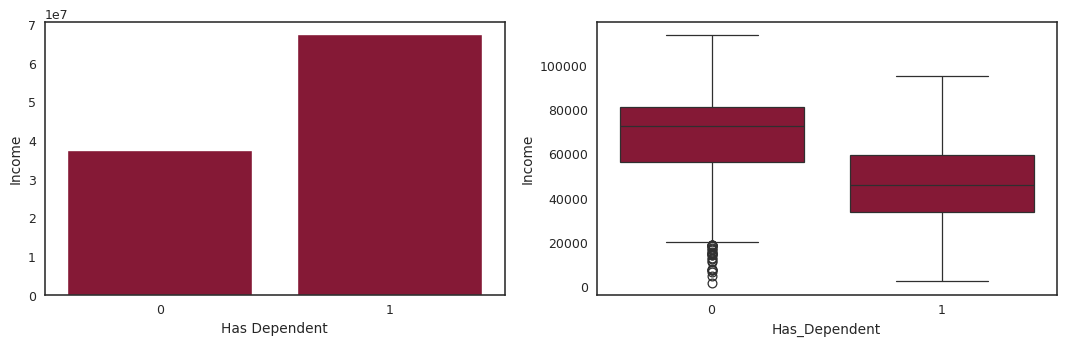

In [ ]:
plt.figure(figsize=(6,4))
sns.set_style('white')

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12,4), dpi=90)

sns.barplot(grouping, x='Has Dependent', y= 'Income', ax=ax1)
sns.boxplot(df_train, x='Has_Dependent', y='Income', ax=ax2)

plt.tight_layout()
plt.show()

- The more customer's have dependent, the higher he/she income's will be. But, let's check the average also to avoid bias

In [ ]:
print("{} effect of variable on income: \n".format('Dependent status'))
print(df_train.groupby('Has_Dependent')['Income'].mean().sort_values(ascending=False))

Dependent status effect of variable on income: 

Has_Dependent
0    65654.964727
1    46240.429849
Name: Income, dtype: float64


- Customer without dependents have the highest average income

***Relationship Between Income and Total Amount Spent(Monetary)***

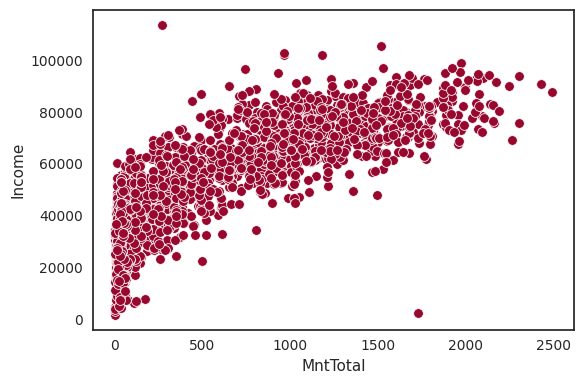

In [ ]:
plt.figure(figsize=(6,4))
sns.set_style('white')

sns.scatterplot(df_train, x='MntTotal', y='Income')
plt.tight_layout()
plt.show()

- There seems to be a positive relationship between a customer's income and their spending.

I will check the heatmap to see the possibility of other variables relationship so can gain some insights.

**Heatmap**

<Axes: >

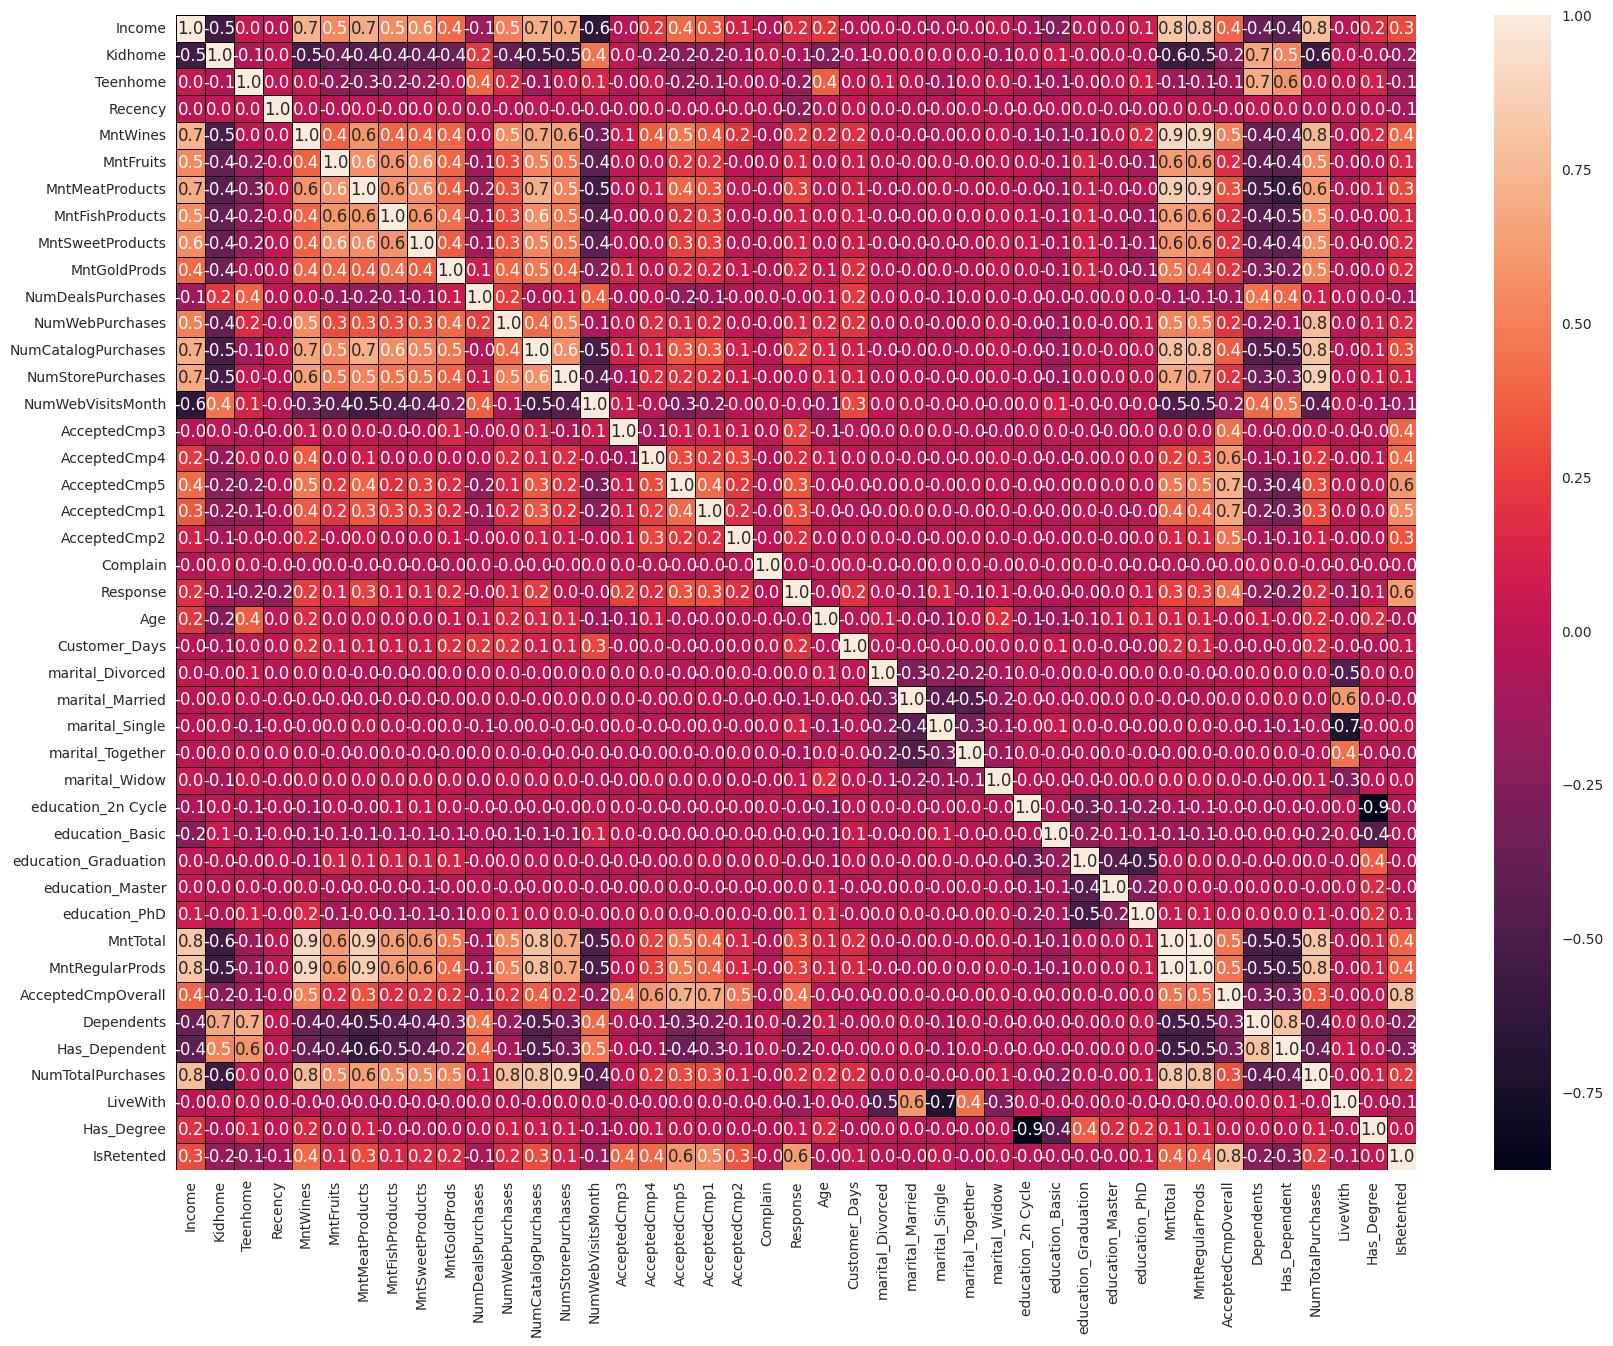

In [ ]:
plt.figure(figsize=(20,15))
sns.set_style('white')

sns.heatmap(df_train.select_dtypes(include='number').corr(), annot=True, linecolor = "black", lw = 0.4, fmt= '.1f')

**Relationship Between Response and [Other Variables]**

In [ ]:
colors = ["#97072e", "#7aca2a"]

def plot_var(col_name, full_name):

    f, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12,6), dpi=90)

    sns.histplot(df_train.loc[df_train[col_name].notnull(), col_name], kde=False, color='#1d468a', ax=ax1)

    sns.boxplot(y=col_name, x='Response', data=df_train, ax=ax2, palette=colors, legend=False)
    ax2.set_ylabel('')
    ax2.set_title('Response by ' + full_name)

    plt.tight_layout()
    plt.show()

with Customer's Tenure

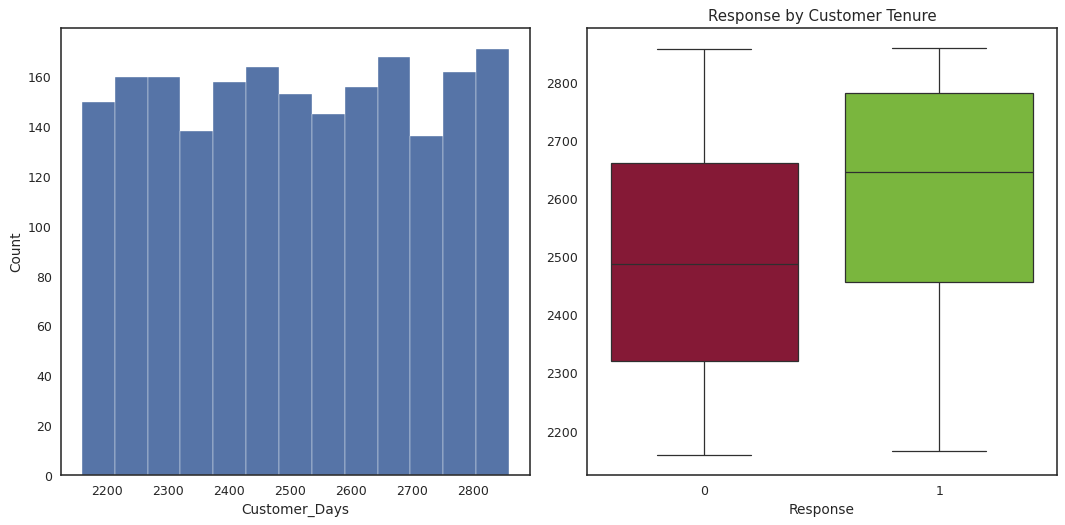

In [ ]:
plot_var('Customer_Days', 'Customer Tenure')

In [ ]:
df_train.groupby('Response')['Customer_Days'].describe()

count         mean         std     min     25%     50%     75%  \
Response                                                                    
0         1710.0  2495.166667  198.679888  2159.0  2321.0  2486.5  2661.0   
1          311.0  2602.041801  200.037500  2165.0  2456.0  2645.0  2780.5   

             max  
Response          
0         2857.0  
1         2858.0

- On average, long-term customers show a higher likelihood of accepting campaign offers.

with Recency

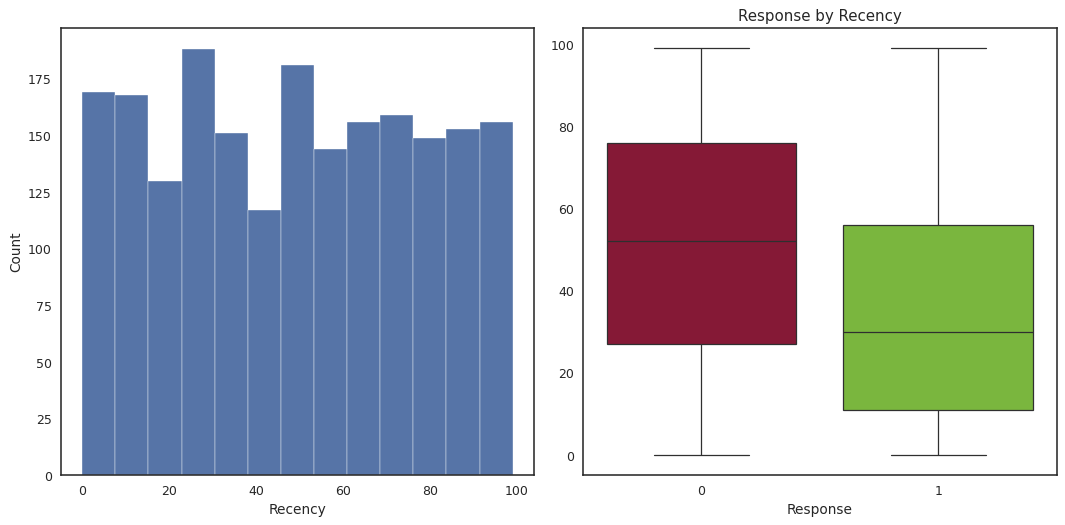

In [ ]:
plot_var('Recency', 'Recency')

In [ ]:
df_train.groupby('Response')['Recency'].describe()

count       mean        std  min   25%   50%   75%   max
Response                                                           
0         1710.0  51.398246  28.530273  0.0  27.0  52.0  76.0  99.0
1          311.0  35.038585  27.330801  0.0  11.0  30.0  56.0  99.0

- On average, customers who accepted a campaign offer made their last purchase 35 days ago. Customers with more recent purchase activity tend to be more receptive to campaign offers.

with Total Purchases in Catalog Channel

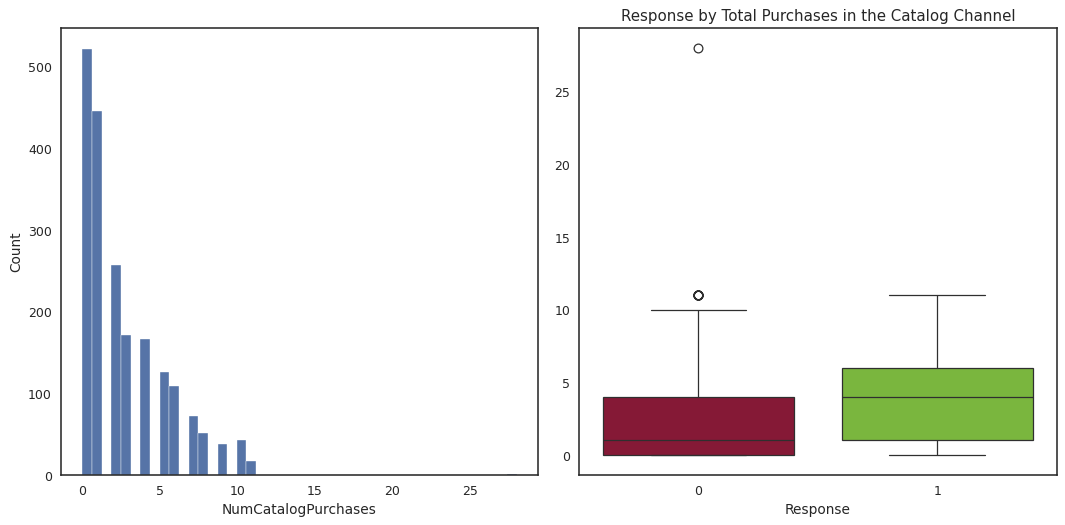

In [ ]:
plot_var('NumCatalogPurchases', 'Total Purchases in the Catalog Channel')

In [ ]:
df_train.groupby('Response')['NumCatalogPurchases'].describe()

count      mean       std  min  25%  50%  75%   max
Response                                                      
0         1710.0  2.365497  2.641941  0.0  0.0  1.0  4.0  28.0
1          311.0  4.180064  3.127359  0.0  1.0  4.0  6.0  11.0

- On average, customers who accepted a campaign offer made 4 purchases through the catalog channel. Those who engage with the catalog channel are more inclined to respond positively to campaign offers.

with Total Amount Spent(Monetary)

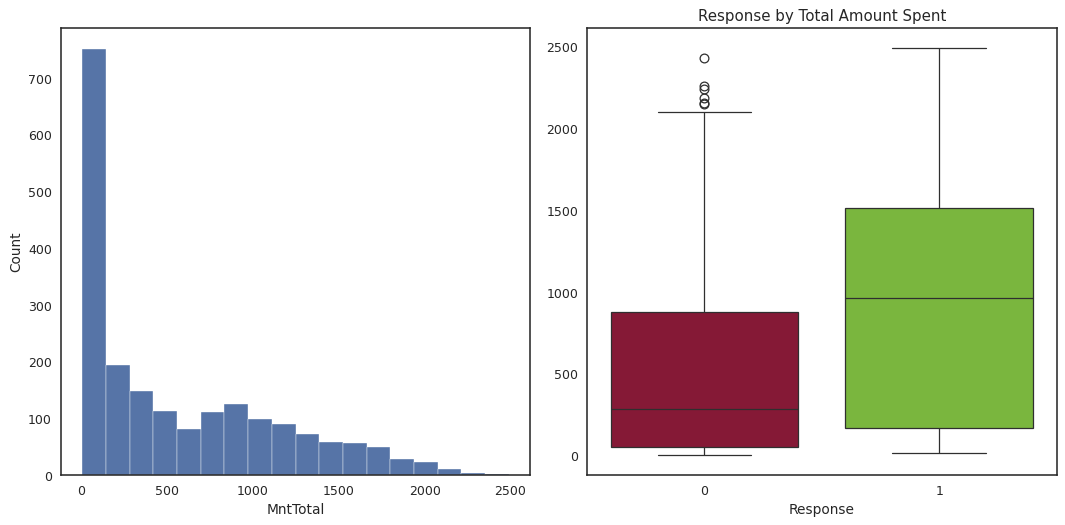

In [ ]:
plot_var('MntTotal', 'Total Amount Spent')

In [ ]:
df_train.groupby('Response')['MntTotal'].describe()

count        mean         std   min    25%    50%     75%     max
Response                                                                    
0         1710.0  499.502339  527.283951   4.0   50.0  282.5   877.5  2429.0
1          311.0  917.263666  697.735333  14.0  170.0  964.0  1517.0  2491.0

- Customers who accepted the offer spent an average total of 917 dollars. Higher spending customers tend to be more responsive to campaign offers.

with Total Amount Spent on Regular Products

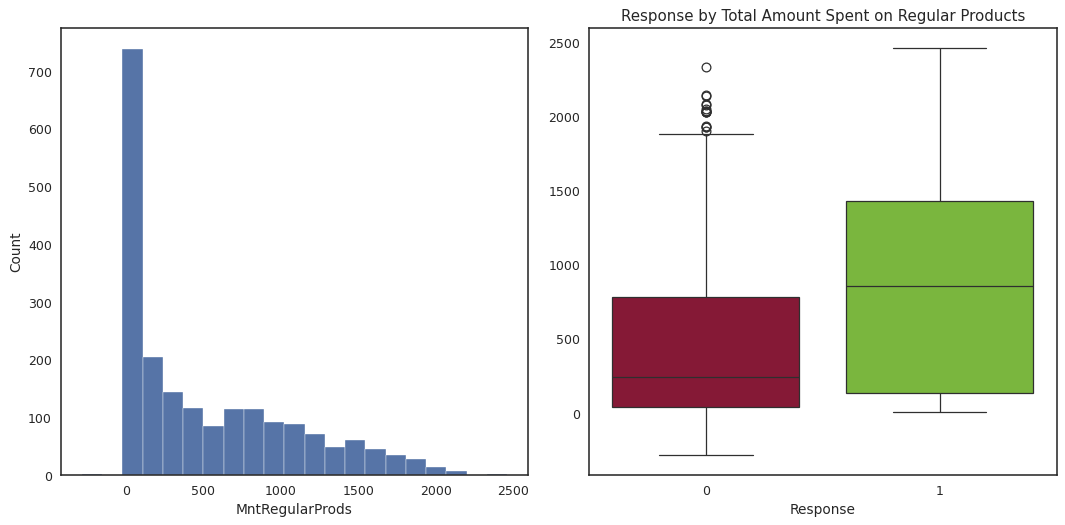

In [ ]:
plot_var('MntRegularProds', 'Total Amount Spent on Regular Products')

In [ ]:
df_train.groupby('Response')['MntRegularProds'].describe()

count        mean         std    min    25%    50%      75%     max
Response                                                                      
0         1710.0  458.983626  505.504396 -283.0   38.0  243.0   780.75  2333.0
1          311.0  854.630225  681.216380    3.0  132.5  858.0  1429.50  2458.0

- On average, customers who accepted the offer spent 854 dollars on regular products. Customers with higher spending on regular products are more likely to respond positively to campaign offers.

with Total Amount Spent on Gold Products

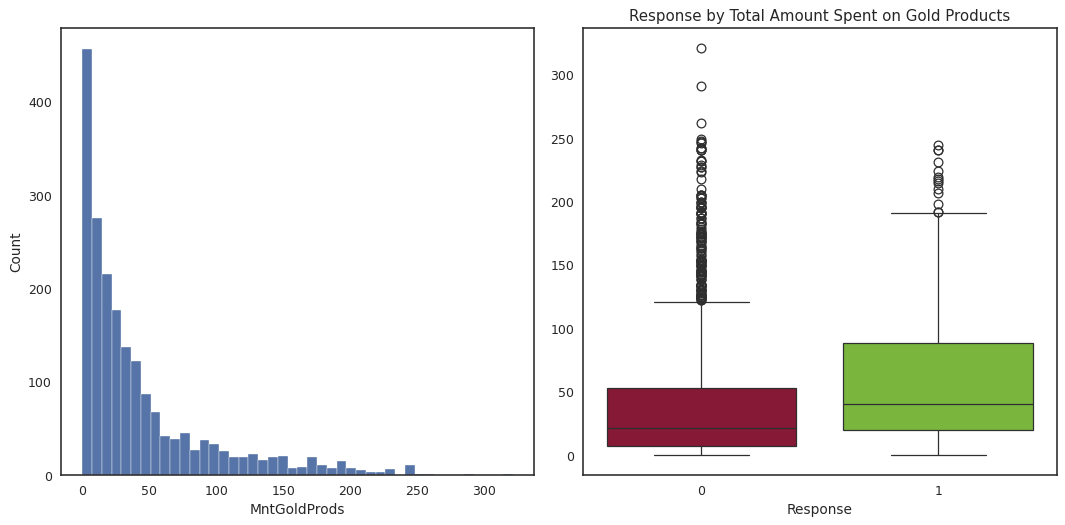

In [ ]:
plot_var('MntGoldProds', 'Total Amount Spent on Gold Products')

In [ ]:
df_train.groupby('Response')['MntGoldProds'].describe()

count       mean        std  min   25%   50%    75%    max
Response                                                             
0         1710.0  40.518713  49.625177  0.0   7.0  21.0  52.75  321.0
1          311.0  62.633441  58.401066  0.0  20.0  40.0  88.50  245.0

- Customers who accepted the offer spent an average of 62 dollars on gold products. Greater spending on gold products is associated with a higher likelihood of accepting campaign offers.

with Total Amount Spent on Wine Products

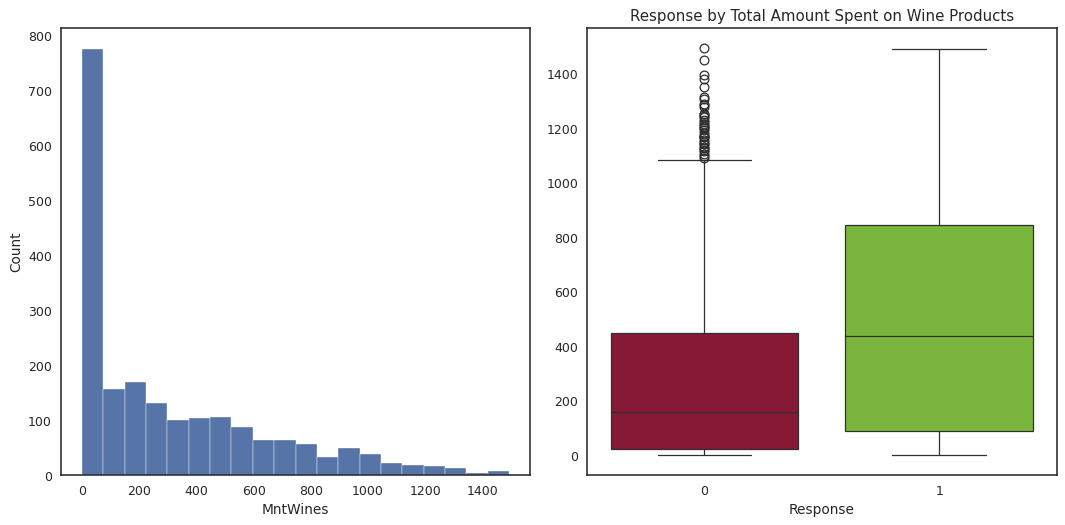

In [ ]:
plot_var('MntWines', 'Total Amount Spent on Wine Products')

In [ ]:
df_train.groupby('Response')['MntWines'].describe()

count        mean         std  min   25%    50%     75%     max
Response                                                                  
0         1710.0  272.361988  307.472981  0.0  22.0  158.0  447.75  1493.0
1          311.0  494.154341  423.958331  1.0  88.0  437.0  843.50  1492.0

- On average, customers who accepted the campaign offer spent 494 dollars on wine products. Higher wine product spending is linked to a greater tendency to accept campaign offers.

with Total Amount Spent on Meat Products

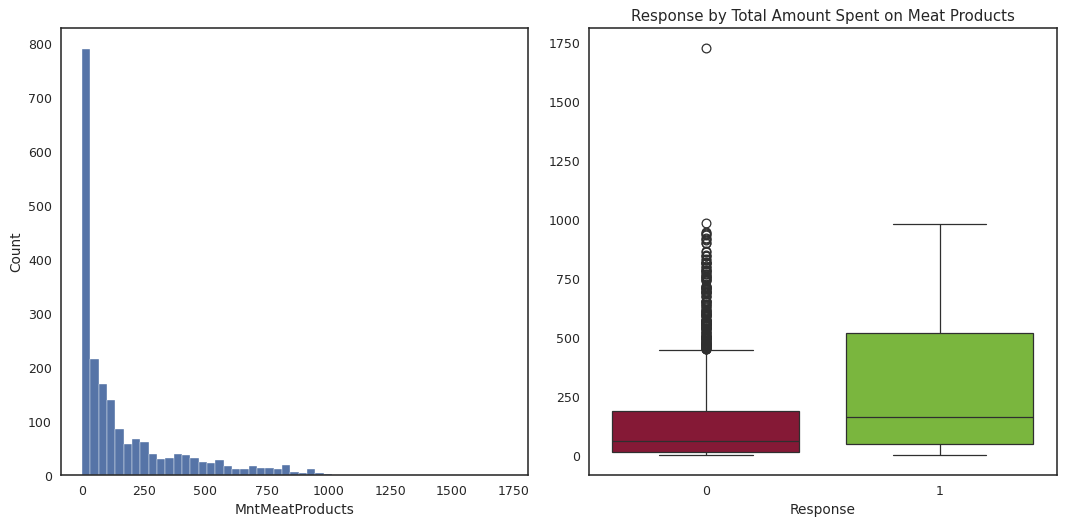

In [ ]:
plot_var('MntMeatProducts', 'Total Amount Spent on Meat Products')

In [ ]:
df_train.groupby('Response')['MntMeatProducts'].describe()

count        mean         std  min   25%    50%    75%     max
Response                                                                 
0         1710.0  142.533918  195.486519  0.0  14.0   57.0  187.5  1725.0
1          311.0  295.414791  290.672255  1.0  46.0  161.0  516.0   981.0

- Customers who accepted the campaign offer spent an average of 295 dollars on meat products. Increased spending on meat products correlates with a higher likelihood of accepting campaign offers.

# **Data Analysis**

In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2021 entries, 0 to 2204
Data columns (total 45 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Income                2021 non-null   float64
 1   Kidhome               2021 non-null   int64  
 2   Teenhome              2021 non-null   int64  
 3   Recency               2021 non-null   int64  
 4   MntWines              2021 non-null   int64  
 5   MntFruits             2021 non-null   int64  
 6   MntMeatProducts       2021 non-null   int64  
 7   MntFishProducts       2021 non-null   int64  
 8   MntSweetProducts      2021 non-null   int64  
 9   MntGoldProds          2021 non-null   int64  
 10  NumDealsPurchases     2021 non-null   int64  
 11  NumWebPurchases       2021 non-null   int64  
 12  NumCatalogPurchases   2021 non-null   int64  
 13  NumStorePurchases     2021 non-null   int64  
 14  NumWebVisitsMonth     2021 non-null   int64  
 15  AcceptedCmp3          2021

**Encoding & Feature Engineering**

Next, I will do some encoding technique for the categorical column which is Education and Marital, either it is ordinal or non-ordinal to gain and analysis the data we have.
- The Ordinal Encoder will be applied to the Education column, because it's contains hierarchical value such as primary school, high school
- The non-ordinal will be applied to Marital column using One-Hot Encoder, because the categorical feature is nominal and do not have any order. Each of this category is mapped with a binary variable containing either 0 or 1. But, if we look precisely into the value itself, the feature is already encoded (non-ordinal), so there is no need to do it again

In [ ]:
# drop some of these feature because it has been simplified into another new feature by feature engineering process
df_train.drop(['education_2n Cycle', 'education_Basic', 'education_Graduation',
         'education_Master', 'education_PhD', 'marital_Married', 'marital_Together', 'marital_Widow',
          'marital_Single', 'marital_Divorced'], inplace=True, axis=1)

In [ ]:
encoder = ce.OrdinalEncoder(cols=['Education'],return_df=True,
                           mapping=[{'col':'Education',
'mapping':{'Unknown':0,'Primary':1,'Secondary':2,'Bachelor':3,'Master':4,'Doctoral':5}}])

In [ ]:
df_encoded = encoder.fit_transform(df_train)

In [ ]:
df_encoded['Education']

0       3
1       3
2       3
3       3
4       5
       ..
2198    3
2200    3
2202    3
2203    4
2204    5
Name: Education, Length: 2021, dtype: int64

**Feature Scaling**

- Feature scaling involves adjusting the values of features so they fall within a similar range.
- This step is crucial in this context because the features vary in scale, and without normalization, those with larger ranges could dominate the analysis and introduce bias.

In [ ]:
# isolate num variables
numerical_variables = [col for col in df_encoded.columns if df_encoded[col].dtype != "object"
                        and col not in "Response"]

# scale numerical variables using RobustScaler since it handles outliers better
scaler = RobustScaler()
df_encoded[numerical_variables] = scaler.fit_transform(df_encoded[numerical_variables])

df_encoded.head()

Income  Kidhome  Teenhome  Recency  MntWines  MntFruits  MntMeatProducts  \
0  0.204699      0.0       0.0     0.18  0.946170   2.580645         2.233645   
1 -0.154239      1.0       1.0    -0.22 -0.345756  -0.225806        -0.289720   
2  0.614797      0.0       0.0    -0.46  0.513458   1.322581         0.275701   
3 -0.753728      1.0       0.0    -0.46 -0.345756  -0.129032        -0.224299   
4  0.209416      1.0       0.0     0.90 -0.010352   1.129032         0.233645   

   MntFishProducts  MntSweetProducts  MntGoldProds  ...  MntRegularProds  \
0         3.404255          2.424242      1.340426  ...         1.370987   
1        -0.212766         -0.212121     -0.404255  ...        -0.324614   
2         2.106383          0.393939      0.361702  ...         0.480380   
3        -0.042553         -0.151515     -0.425532  ...        -0.291320   
4         0.723404          0.575758     -0.212766  ...         0.123662   

   AcceptedCmpOverall  Dependents  Has_Dependent  NumTotalPurchases   Marital  \
0                 0.0        -1.0           -1.0           0.833333    Single   
1                 0.0         1.0            0.0          -0.666667    Single   
2                 0.0        -1.0           -1.0           0.666667  Together   
3                 0.0         0.0            0.0          -0.500000  Together   
4                 0.0         0.0            0.0           0.166667   Married   

   LiveWith  Education  Has_Degree  IsRetented  
0      -1.0        0.0         0.0         0.0  
1      -1.0        0.0         0.0         0.0  
2       0.0        0.0         0.0         0.0  
3       0.0        0.0         0.0         0.0  
4       0.0        2.0         0.0         0.0  

[5 rows x 35 columns]

**Customers Segmentation**

RFM analysis is a technique used to segment customers based on their purchasing behavior. It evaluates three key dimensions derived from past transactions:

- Recency: Measures how recently a customer made a purchase — represented here by the `Recency` feature.

- Frequency: Captures how often a customer makes purchases — represented by the `NumTotalPurchases` feature.

- Monetary: Reflects how much a customer spends — represented by the `MntTotal` feature in this case.

In [ ]:
rfm = ['Recency', 'NumTotalPurchases', 'MntTotal']

Quartiles

- A straightforward approach to segment customers using the RFM model is by dividing each metric into quartiles.
- Each customer is assigned a score from 1 to 4 for Recency, Frequency, and Monetary — where 1 indicates the least favorable value and 4 the most favorable.

In [ ]:
df_rfm = df_train.copy()

In [ ]:
quantiles = df_rfm[rfm].quantile(q = [0.25,0.50,0.75])
quantiles

Recency  NumTotalPurchases  MntTotal
0.25     24.0                6.0      55.0
0.50     49.0               12.0     343.0
0.75     74.0               18.0     964.0

In [ ]:
# creating functions to determine the RFM score
def R_score(data):
    if data <= quantiles['Recency'][0.25]:
        return 1
    elif data > quantiles['Recency'][0.25] and data <= quantiles['Recency'][0.5]:
        return 2
    elif data > quantiles['Recency'][0.5] and data <= quantiles['Recency'][0.75]:
        return 3
    else:
        return 4

def F_score(data):
    if data <= quantiles['NumTotalPurchases'][0.25]:
        return 4
    elif data > quantiles['NumTotalPurchases'][0.25] and data <= quantiles['NumTotalPurchases'][0.5]:
        return 3
    elif data > quantiles['NumTotalPurchases'][0.5] and data <= quantiles['NumTotalPurchases'][0.75]:
        return 2
    else:
        return 1


def M_score(data):
    if data <= quantiles['MntTotal'][0.25]:
        return 4
    elif data > quantiles['MntTotal'][0.25] and data <= quantiles['MntTotal'][0.5]:
        return 3
    elif data > quantiles['MntTotal'][0.5] and data <= quantiles['MntTotal'][0.75]:
        return 2
    else:
        return 1

In [ ]:
df_rfm['R_score'] = df_rfm['Recency'].apply(lambda x : R_score(x))
df_rfm['F_score'] = df_rfm['NumTotalPurchases'].apply(lambda x : F_score(x))
df_rfm['M_score'] = df_rfm['MntTotal'].apply(lambda x : M_score(x))
df_rfm['RFM_score'] = df_rfm['R_score'].map(str) + df_rfm['F_score'].map(str) + df_rfm['M_score'].map(str)

In [ ]:
df_rfm['RFM_score'].head()

0    311
1    244
2    212
3    244
4    422
Name: RFM_score, dtype: object

**Clustering Customers using K-Means Algorithm**

In this case, the selected features align with the RFM framework, but have been scaled beforehand.
Standardizing the feature values is advisable, especially when using distance-based algorithms like K-Means, to ensure fair contribution from each feature during clustering.

In [ ]:
df_cluster = df_encoded.copy()

In [ ]:
# Drop categorical feature
df_cluster.drop(['Marital'], inplace=True, axis=1)

**Determine Number of Clusters**

**1. Elbow Method**

Finding the optimal K in K-Means Clustering

In [ ]:
X = df_cluster[rfm]
inertia_list = []
for K in range(2,10):
    inertia = KMeans(n_clusters=K, init='k-means++', n_init=10, max_iter=100, random_state=42).fit(X).inertia_
    inertia_list.append(inertia)

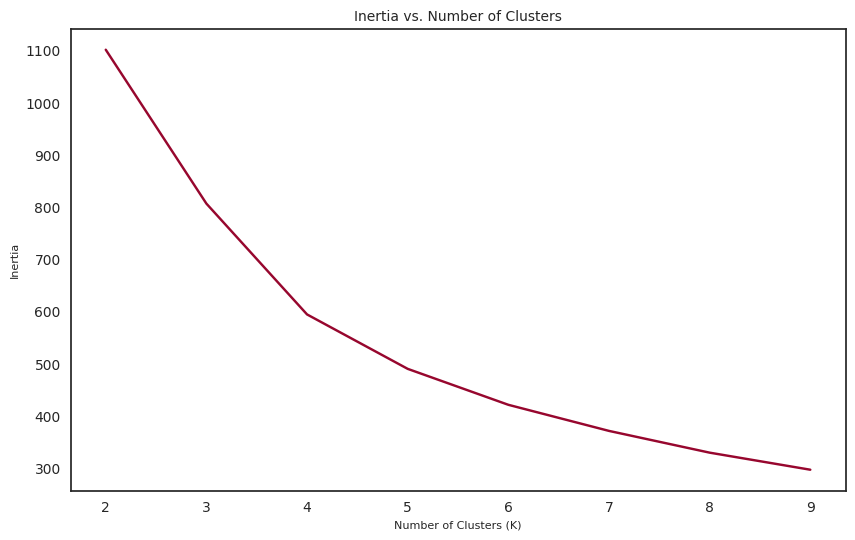

In [ ]:
# Elbow Method Visualization
plt.figure(figsize=[10,6])
plt.plot(range(2,10), inertia_list)
plt.title("Inertia vs. Number of Clusters", fontsize="10")
plt.xlabel("Number of Clusters (K)", fontsize="8")
plt.ylabel("Inertia", fontsize="8")
plt.show()

The elbow method does not show a distinct inflection point, making it difficult to determine the optimal value of K.

**2. Silhouette Score Method**

Finding the optimal number of K, because in the elbow method part doesn't show effectively the elbow point.

In [ ]:
silhouette_list = []
for K in range(2,10):
    model = KMeans(n_clusters = K, init='k-means++', n_init=10, max_iter=100, random_state=42)
    clusters = model.fit_predict(X)
    s_avg = silhouette_score(X, clusters)
    silhouette_list.append(s_avg)

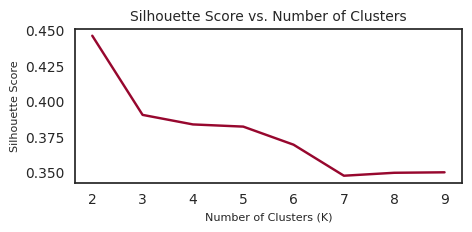

In [ ]:
# Silhouette Score Visualization
plt.figure(figsize=[5,2])
plt.plot(range(2,10), silhouette_list)
plt.title("Silhouette Score vs. Number of Clusters", fontsize="10")
plt.xlabel("Number of Clusters (K)", fontsize="8")
plt.ylabel("Silhouette Score", fontsize="8")
plt.show()

Although the silhouette score reaches its peak value of 0.45 at K=2, this alone is not enough to confidently determine the optimal number of clusters.

I'll use the Silhouette Visualizer instead

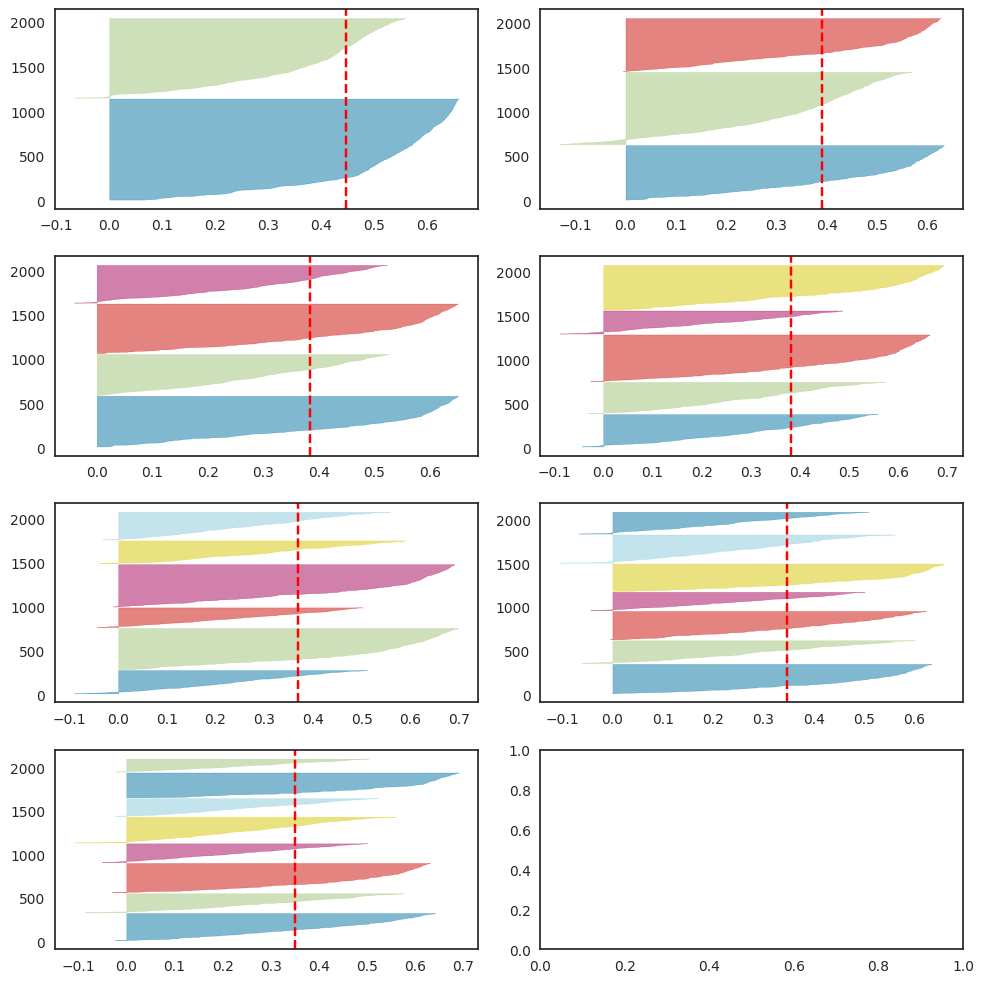

In [ ]:
fig, ax = plt.subplots(4, 2, figsize=(10,10))
for i in [2, 3, 4, 5, 6, 7, 8]:
    km = KMeans(n_clusters=i, n_init=10, init='k-means++', max_iter=100, random_state=42)
    q, mod = divmod(i, 2)
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(X)

plt.tight_layout()

To determine the optimal K using the silhouette visualizer above, certain conditions must be met such as:

- Each cluster's silhouette score should exceed the overall average (indicated by the red dashed line on the x-axis). In this case, all clusters meet that requirement.

- The cluster sizes should be relatively balanced, without significant disparities. For instance, with K=2, the green cluster is nearly twice as wide as the blue one. Similarly, clusterings with K=[5, 6, 7, 8] are excluded due to uneven cluster sizes.

- While both K=3 and K=4 result in fairly uniform clusters, K=4 achieves slightly better balance.

**Therefore, based on the silhouette plot criteria, K=4 is selected as the optimal number of clusters.**

**Clustering Visualization**

In [ ]:
cluster = KMeans(n_clusters=4, init='k-means++', n_init=10, max_iter=100, random_state=42)
cluster.fit(df_cluster[rfm])
df_cluster['Cluster'] = cluster.predict(df_cluster[rfm])

In [ ]:
df_rfm['Cluster'] = df_cluster['Cluster']

In [ ]:
num_cols = df_rfm.select_dtypes(include='number').columns
df_rfm.groupby('Cluster')[num_cols].mean()

Income   Kidhome  Teenhome    Recency    MntWines  MntFruits  \
Cluster                                                                       
0        37724.710297  0.736475  0.537522  73.347295   72.467714   7.291449   
1        69352.924242  0.090909  0.515152  73.261905  605.049784  49.101732   
2        37421.789286  0.680357  0.516071  23.569643   76.725000   6.755357   
3        70062.061033  0.119718  0.457746  22.802817  599.525822  53.138498   

         MntMeatProducts  MntFishProducts  MntSweetProducts  MntGoldProds  \
Cluster                                                                     
0              34.429319        10.169284          7.218150     21.420593   
1             330.201299        71.948052         54.309524     72.623377   
2              33.169643        10.267857          6.312500     22.083929   
3             339.791080        73.192488         52.460094     71.767606   

         ...  Dependents  Has_Dependent  NumTotalPurchases  LiveWith  \
Cluster  ...                                                           
0        ...    1.273997       0.897033           7.123909  0.649215   
1        ...    0.606061       0.512987          19.294372  0.619048   
2        ...    1.196429       0.875000           7.146429  0.651786   
3        ...    0.577465       0.500000          19.720657  0.636150   

         Has_Degree  IsRetented   R_score   F_score   M_score  Cluster  
Cluster                                                                 
0          0.856894    0.013962  3.455497  3.452007  3.322862      0.0  
1          0.937229    0.168831  3.424242  1.482684  1.439394      1.0  
2          0.855357    0.058929  1.485714  3.435714  3.348214      2.0  
3          0.906103    0.234742  1.471831  1.441315  1.434272      3.0  

[4 rows x 37 columns]

In [ ]:
df_rfm.head()

Income  Kidhome  Teenhome  Recency  MntWines  MntFruits  MntMeatProducts  \
0  58138.0        0         0       58       635         88              546   
1  46344.0        1         1       38        11          1                6   
2  71613.0        0         0       26       426         49              127   
3  26646.0        1         0       26        11          4               20   
4  58293.0        1         0       94       173         43              118   

   MntFishProducts  MntSweetProducts  MntGoldProds  ...   Marital  LiveWith  \
0              172                88            88  ...    Single         0   
1                2                 1             6  ...    Single         0   
2              111                21            42  ...  Together         1   
3               10                 3             5  ...  Together         1   
4               46                27            15  ...   Married         1   

   Education  Has_Degree  IsRetented  R_score  F_score  M_score  RFM_score  \
0   Bachelor           1           0        3        1        1        311   
1   Bachelor           1           0        2        4        4        244   
2   Bachelor           1           0        2        1        2        212   
3   Bachelor           1           0        2        4        4        244   
4   Doctoral           1           0        4        2        2        422   

   Cluster  
0        1  
1        2  
2        3  
3        2  
4        0  

[5 rows x 40 columns]

**Clustering Distribution**

In [ ]:
grouping = df_rfm.groupby('Cluster').size().reset_index()
grouping.columns = ['Cluster', 'Count']
grouping

Cluster  Count
0        0    573
1        1    462
2        2    560
3        3    426

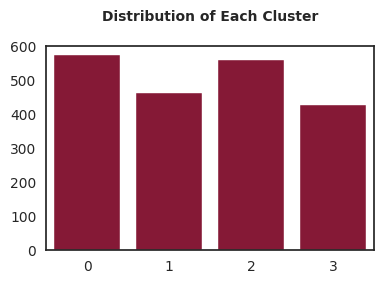

In [ ]:
plt.figure(figsize=(4,3))
sns.set_style('white')

sns.barplot(grouping, x='Cluster', y='Count', color='#97072e')
plt.title('Distribution of Each Cluster\n', fontsize=10, fontweight='bold')
plt.xlabel('', fontsize=9)
plt.ylabel('', fontsize=9)
plt.tight_layout()
plt.show()

In [ ]:
colors = ['#3fdab6', '#e6db6f', '#cc5868', '#6e85b6']

def plot_cluster(col_name, full_name):

    f, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(9,3), dpi=90)

    sns.barplot(data=df_rfm, y=col_name, x='Cluster', ax=ax1, palette=colors)
    ax1.set_ylabel('')
    ax1.set_title('Cluster by ' + full_name)

    sns.boxplot(y=col_name, x='Cluster', data=df_rfm, ax=ax2, palette=colors, legend=False)
    ax2.set_ylabel('')
    ax2.set_title('Cluster by ' + full_name)

    plt.tight_layout()
    plt.show()

**Clustering by Recency**

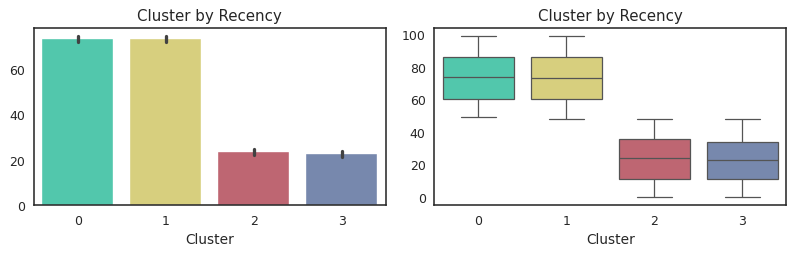

In [ ]:
plot_cluster('Recency', 'Recency')

In [ ]:
df_rfm.groupby('Cluster')['Recency'].describe()

count       mean        std   min   25%   50%   75%   max
Cluster                                                           
0        573.0  73.347295  15.036081  49.0  60.0  74.0  86.0  99.0
1        462.0  73.261905  14.692016  48.0  60.0  73.0  86.0  99.0
2        560.0  23.569643  14.270031   0.0  11.0  24.0  36.0  48.0
3        426.0  22.802817  14.084404   0.0  11.0  23.0  34.0  48.0

- Cluster 0 and 1  consist of customers who haven't made a purchase in a while, with their last purchase occurring approximately 73 days ago.
- Meanwhile, Clusters 2 and 3 include more recent buyers, having made their latest purchase around 22 days ago.

**Clustering by Frequency**

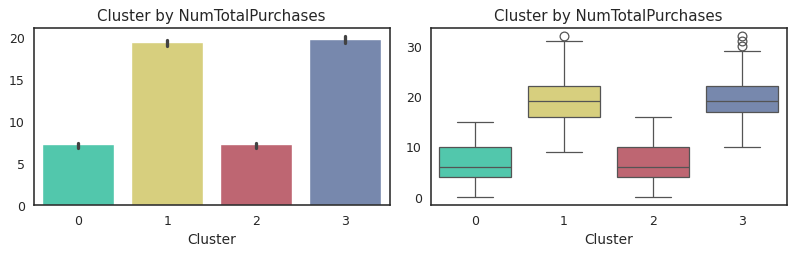

In [ ]:
plot_cluster('NumTotalPurchases', 'NumTotalPurchases')

In [ ]:
df_rfm.groupby('Cluster')['NumTotalPurchases'].describe()

count       mean       std   min   25%   50%   75%   max
Cluster                                                          
0        573.0   7.123909  3.466171   0.0   4.0   6.0  10.0  15.0
1        462.0  19.294372  3.888346   9.0  16.0  19.0  22.0  32.0
2        560.0   7.146429  3.583902   0.0   4.0   6.0  10.0  16.0
3        426.0  19.720657  3.900455  10.0  17.0  19.0  22.0  32.0

- Cluster 1 and 3 represent frequent buyers, averaging 19 purchases.
- While, Cluster 0 and 2 show lower purchasing frequency, averaging 7 purchases.

**Clustering by Monetary**

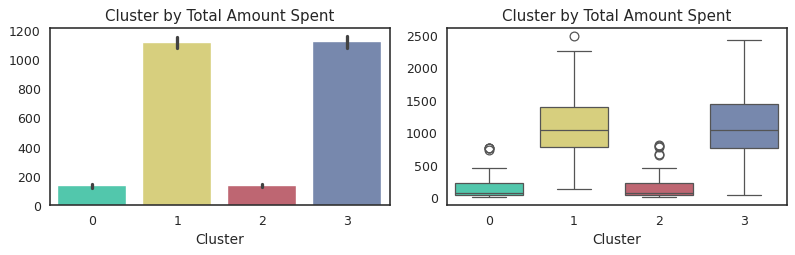

In [ ]:
plot_cluster('MntTotal', 'Total Amount Spent')

In [ ]:
df_rfm.groupby('Cluster')['MntTotal'].describe()

count         mean         std    min     25%     50%      75%  \
Cluster                                                                   
0        573.0   131.575916  134.086236    4.0   37.00    64.0   219.00   
1        462.0  1110.610390  428.217386  125.0  780.25  1040.0  1396.00   
2        560.0   133.230357  139.727074    5.0   34.00    63.0   219.25   
3        426.0  1118.107981  450.795686   38.0  763.25  1044.0  1444.75   

            max  
Cluster          
0         770.0  
1        2491.0  
2         803.0  
3        2429.0

- Cluster 1 and 3 consist of high-spending customers with an average total expenditure of approximately 1,110.
- While, Cluster 0 and 2 include lower spenders who spend around 130 on average.

***Relationship Between Recency and Frequency***

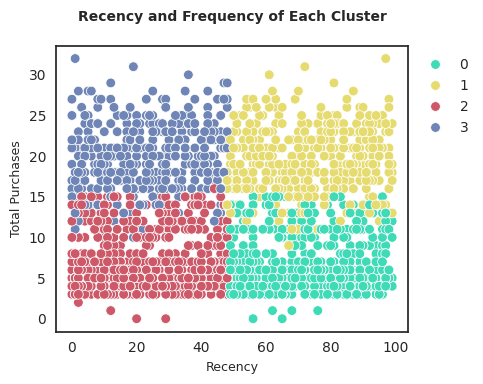

In [ ]:
plt.figure(figsize=(5,4))
sns.set_style('white')

sns.scatterplot(df_rfm, y='NumTotalPurchases', x='Recency', hue = 'Cluster', palette=colors)
plt.title('Recency and Frequency of Each Cluster\n', fontsize=10, fontweight='bold')
plt.ylabel('Total Purchases', fontsize=9)
plt.xlabel('Recency', fontsize=9)
plt.legend(bbox_to_anchor=(1, 1), loc='upper left')
plt.tight_layout()
plt.show()

- Cluster 0 comprises customers who haven't made a purchase for a long time, with their last purchase between 49 and 99 days ago, and they have an average total purchase of fewer than 15.
- Cluster 1 consists of customers who haven't made a purchase in a while, with their last purchase occurring between 48 and 99 days ago, and they have an average of over 15 total purchases.
- Cluster 2 includes customers who made a purchase within the last 0 to 48 days, with an average total purchase of fewer than 15.
- Cluster 3 consists of customers who made a purchase within the last 0 to 48 days, and they have an average of over 15 total purchases.

***Relationship Between Recency and Monetary***

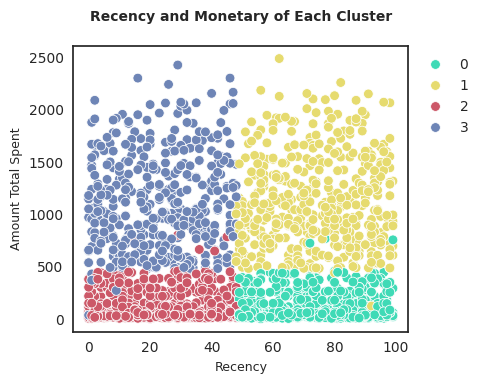

In [ ]:
plt.figure(figsize=(5,4))
sns.set_style('white')

sns.scatterplot(df_rfm, y='MntTotal', x='Recency', hue = 'Cluster', palette=colors)
plt.title('Recency and Monetary of Each Cluster\n', fontsize=10, fontweight='bold')
plt.ylabel('Amount Total Spent', fontsize=9)
plt.xlabel('Recency', fontsize=9)
plt.legend(bbox_to_anchor=(1, 1), loc='upper left')
plt.tight_layout()
plt.show()

- Cluster 0 comprises customers who haven't purchased in a long time (around 49-99 days), with an average spending of less than 500.
- Cluster 1 consists of customers who haven't made a purchase in a long time — approximately 48 to 99 days ago — and have spent more than 500 on average.
- Cluster 2 includes customers who recently made a purchase (within 0-48 days) and tend to spend less than 500 on average.
- Cluster 3 represents recent buyers (within 0-48 days) who spend more than 500 on average.

***Relationship Between Frequency and Monetary***

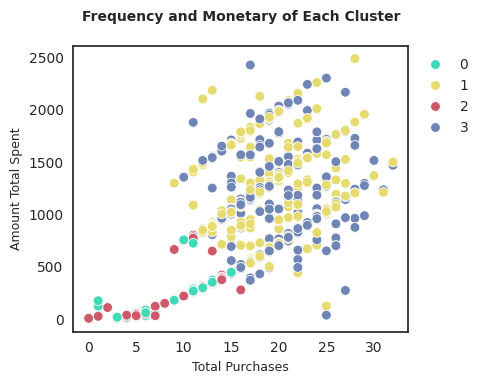

In [ ]:
plt.figure(figsize=(5,4))
sns.set_style('white')

sns.scatterplot(df_rfm, y='MntTotal', x='NumTotalPurchases', hue = 'Cluster', palette=colors)
plt.title('Frequency and Monetary of Each Cluster\n', fontsize=10, fontweight='bold')
plt.ylabel('Amount Total Spent', fontsize=9)
plt.xlabel('Total Purchases', fontsize=9)
plt.legend(bbox_to_anchor=(1, 1), loc='upper left')
plt.tight_layout()
plt.show()

- Cluster 0 and 2 consist of customers with fewer than 16 total purchases and total spending that does not exceed 800.
- Cluster 1 and 3 include customers with more than 9 purchases and spending ranging from 30 to 3000.

**Clustering by Income**

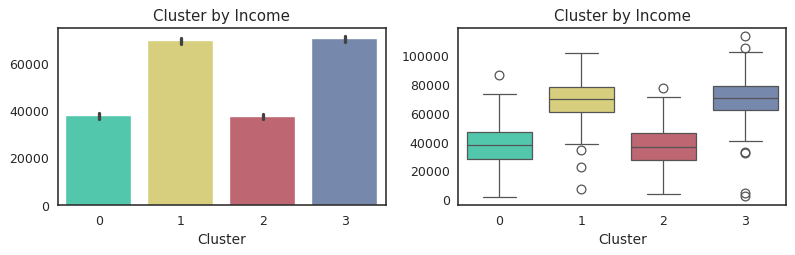

In [ ]:
plot_cluster('Income', 'Income')

In [ ]:
df_rfm.groupby('Cluster')['Income'].describe()

count          mean           std     min       25%      50%  \
Cluster                                                                 
0        573.0  37724.710297  13718.933653  1730.0  27943.00  37760.0   
1        462.0  69352.924242  12201.304595  7144.0  61093.00  70077.0   
2        560.0  37421.789286  13573.938954  4023.0  27585.75  36864.5   
3        426.0  70062.061033  13166.635060  2447.0  62092.50  70304.0   

              75%       max  
Cluster                      
0        47009.00   86580.0  
1        78119.25  102160.0  
2        46630.50   77882.0  
3        78946.75  113734.0

- Cluster 0 and 2 consist of lower-income customers, with an average income of approximately 37,000.
- Cluster 1 and 3 represent customers with higher incomes, averaging around 70,000.

**Clustering by Num of Dependents**

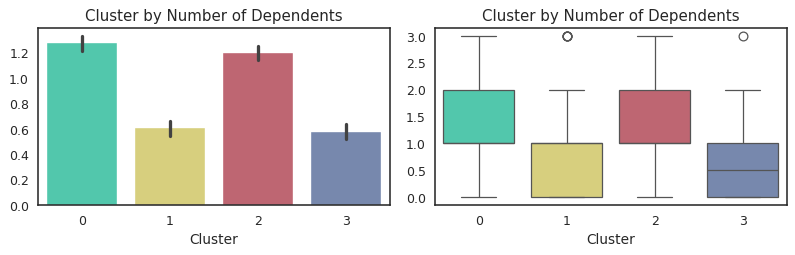

In [ ]:
plot_cluster('Dependents', 'Number of Dependents')

In [ ]:
df_rfm.groupby('Cluster')['Dependents'].describe()

count      mean       std  min  25%  50%  75%  max
Cluster                                                    
0        573.0  1.273997  0.697125  0.0  1.0  1.0  2.0  3.0
1        462.0  0.606061  0.665713  0.0  0.0  1.0  1.0  3.0
2        560.0  1.196429  0.685125  0.0  1.0  1.0  2.0  3.0
3        426.0  0.577465  0.636061  0.0  0.0  0.5  1.0  3.0

- Cluster 0 and 2 are customers who have an average of 1 dependent
- Cluster 1 and 3 are customers who do not have dependents

**Clustering by Product References**

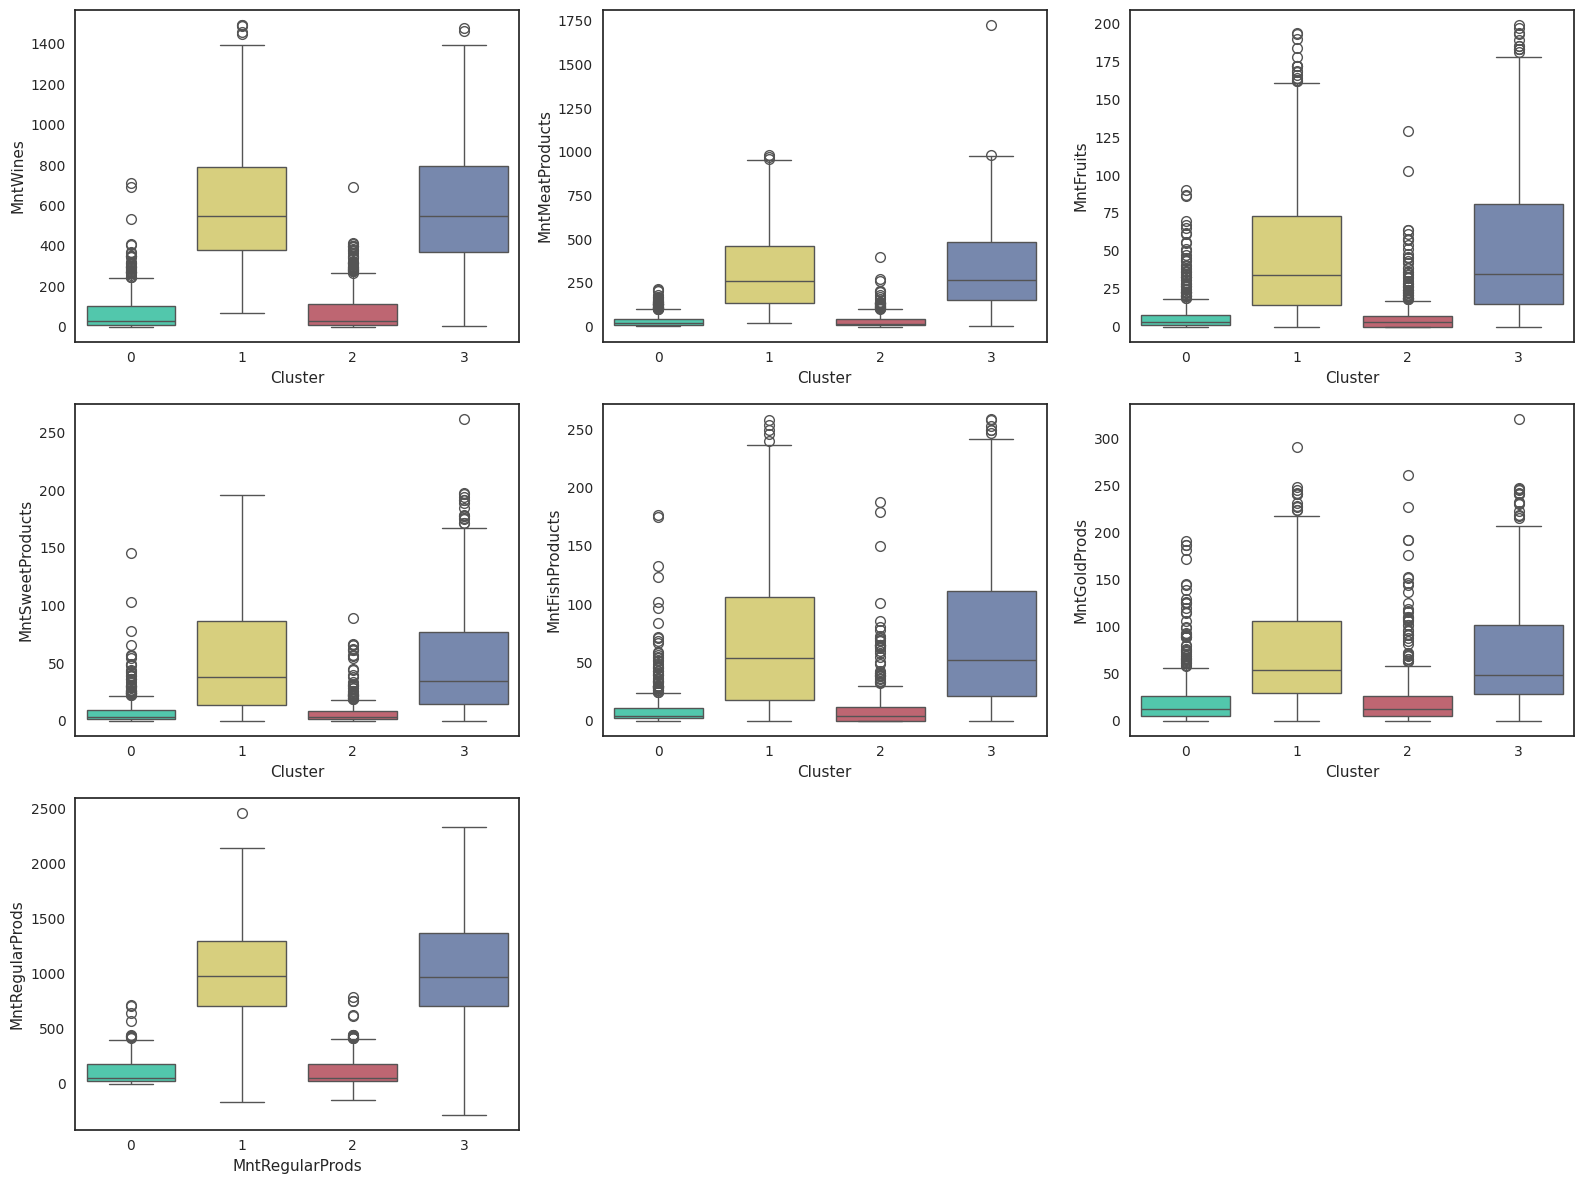

In [ ]:
cols_prod = ['MntWines', 'MntMeatProducts', 'MntFruits', 'MntSweetProducts',
             'MntFishProducts', 'MntGoldProds', 'MntRegularProds']

fig = plt.figure(figsize=(16,12))

for i in range(0, len(cols_prod)):
    plt.subplot(3,3,i+1)
    sns.boxplot(y=df_rfm[cols_prod[i]], x=df_rfm['Cluster'], palette=colors)
plt.xlabel(cols_prod[i])
plt.tight_layout()
plt.show()

In [ ]:
df_rfm.groupby('Cluster')[cols_prod].mean()

MntWines  MntMeatProducts  MntFruits  MntSweetProducts  \
Cluster                                                             
0         72.467714        34.429319   7.291449          7.218150   
1        605.049784       330.201299  49.101732         54.309524   
2         76.725000        33.169643   6.755357          6.312500   
3        599.525822       339.791080  53.138498         52.460094   

         MntFishProducts  MntGoldProds  MntRegularProds  
Cluster                                                  
0              10.169284     21.420593       110.155323  
1              71.948052     72.623377      1037.987013  
2              10.267857     22.083929       111.146429  
3              73.192488     71.767606      1046.340376

- Cluster 0 and 2 have low purchasing frequencies for each product category
- Cluster 1 and 3 have a high purchasing frequency in all product categories

**Clustering by Channel Performance**

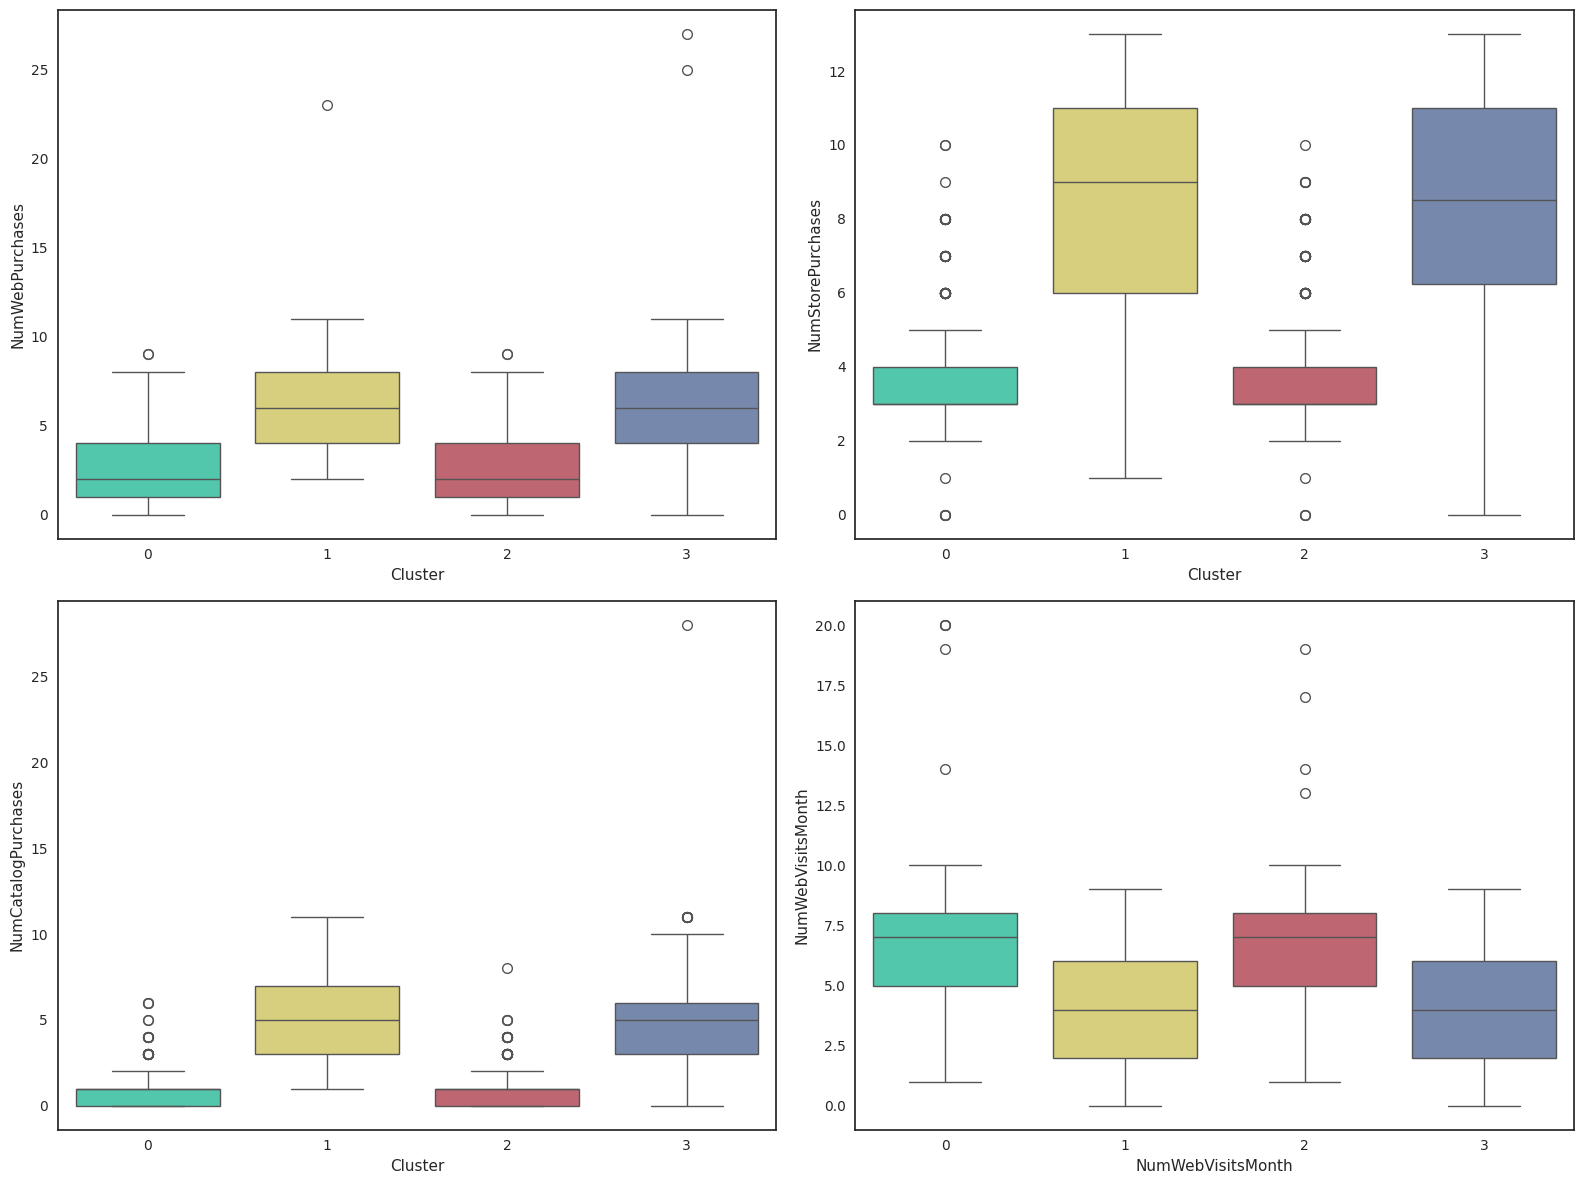

In [ ]:
cols_channel = ['NumWebPurchases', 'NumStorePurchases', 'NumCatalogPurchases',
             'NumWebVisitsMonth']

fig = plt.figure(figsize=(16,12))

for i in range(0, len(cols_channel)):
    plt.subplot(2,2,i+1)
    sns.boxplot(y=df_rfm[cols_channel[i]], x=df_rfm['Cluster'], palette=colors)
plt.xlabel(cols_channel[i])
plt.tight_layout()
plt.show()

In [ ]:
df_rfm.groupby('Cluster')[cols_channel].mean()

NumWebPurchases  NumStorePurchases  NumCatalogPurchases  \
Cluster                                                            
0               2.636998           3.682373             0.804538   
1               5.867965           8.413420             5.012987   
2               2.650000           3.692857             0.803571   
3               6.129108           8.619718             4.971831   

         NumWebVisitsMonth  
Cluster                     
0                 6.345550  
1                 4.012987  
2                 6.335714  
3                 4.119718

- Cluster 1 and 3 show a high frequency of purchases across all channels, whereas Clusters 0 and 2 demonstrate lower purchasing activity on each channel.
- Cluster 0 and 2 make the fewest purchases overall but have the highest number of web visits compared to other clusters.

From this, the following insights emerge:
- Customers with high purchase frequency and spending tend to visit the website less frequently. This could indicate that they are already familiar with the company's products and make quick purchasing decisions.
- Customers with lower purchase frequency and spending often visit the website more frequently. This behavior may suggest hesitation or indecision, possibly due to comparing product options, prices, or delivery fees between IFood and competitors.

**Characteristics of Each Cluster**

From the visualization, we can classify customer segments as follows:

**Cluster 3: Core Champions**
Customers who purchased recently, buy frequently, and spend the most. These are iFood's most valuable customers.

**Cluster 2: Newcomer Shoppers**
Customers who made recent purchases but in low quantities and value. They may be new users still exploring iFood's offerings.

**Cluster 1: High-Value At Risk**
Customers who used to purchase frequently and spend a lot but haven't bought anything recently. These are high-value customers at risk of churning and should be re-engaged.

**Cluster 0: Dormant Buyers**
Customers who bought infrequently and spent little—and haven't purchased in a long time. Some of them may have already switched to competitors.

In [ ]:
# Cluster the 4 segment into each of their name and assign it into Segments column
def cluster_segments(row):
    if row['Cluster'] == 0:
        return 'Dormant Buyers'
    elif row['Cluster'] == 1:
        return 'High-Value at Risk'
    elif row['Cluster'] == 2:
        return 'Newcomer Shoppers'
    elif row['Cluster'] == 3:
        return 'Core Champions'
    else:
        return 'Unknown'

df_rfm['Segments'] = df_rfm.apply(cluster_segments, axis=1)

In [ ]:
df_rfm.head()

Income  Kidhome  Teenhome  Recency  MntWines  MntFruits  MntMeatProducts  \
0  58138.0        0         0       58       635         88              546   
1  46344.0        1         1       38        11          1                6   
2  71613.0        0         0       26       426         49              127   
3  26646.0        1         0       26        11          4               20   
4  58293.0        1         0       94       173         43              118   

   MntFishProducts  MntSweetProducts  MntGoldProds  ...  LiveWith  Education  \
0              172                88            88  ...         0   Bachelor   
1                2                 1             6  ...         0   Bachelor   
2              111                21            42  ...         1   Bachelor   
3               10                 3             5  ...         1   Bachelor   
4               46                27            15  ...         1   Doctoral   

   Has_Degree  IsRetented  R_score  F_score  M_score  RFM_score  Cluster  \
0           1           0        3        1        1        311        1   
1           1           0        2        4        4        244        2   
2           1           0        2        1        2        212        3   
3           1           0        2        4        4        244        2   
4           1           0        4        2        2        422        0   

             Segments  
0  High-Value at Risk  
1   Newcomer Shoppers  
2      Core Champions  
3   Newcomer Shoppers  
4      Dormant Buyers  

[5 rows x 41 columns]

In [ ]:
df_rfm.to_csv("df_rfm.csv")

In [ ]:
grouping = df_rfm.groupby('Segments').size().reset_index()
grouping.columns = ['Segments', 'Count']
grouping['%'] = round(grouping['Count']*100/sum(grouping['Count']),2)
grouping

Segments  Count      %
0      Core Champions    426  21.08
1      Dormant Buyers    573  28.35
2  High-Value at Risk    462  22.86
3   Newcomer Shoppers    560  27.71

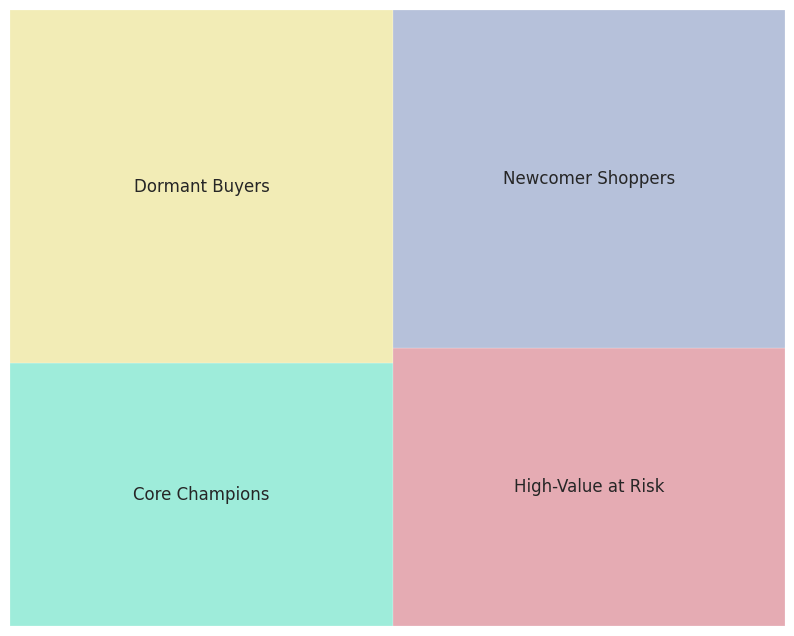

In [ ]:
fig, ax = plt.subplots(1, figsize = (10,8))

sq.plot(sizes=grouping['Count'],
              label=grouping['Segments'],
              alpha=.5,
              color=['#3fdab6', '#e6db6f', '#cc5868', '#6e85b6']
             )
plt.axis('off')
plt.show()

**Top 5 Best Customer with Recent Purchase**

In [ ]:
segment = df_rfm.sort_values('Recency', ascending=True).head(5)
segment

Income  Kidhome  Teenhome  Recency  MntWines  MntFruits  \
519   44931.0        0         1        0        78          0   
374   62499.0        1         0        0       140          4   
91    47823.0        0         1        0        53          1   
1180  54809.0        1         1        0        63          6   
330   84835.0        0         0        0       189        104   

      MntMeatProducts  MntFishProducts  MntSweetProducts  MntGoldProds  ...  \
519                11                0                 0             7  ...   
374                61                0                13             4  ...   
91                  5                2                 1            10  ...   
1180               57               13                13            22  ...   
330               379              111               189           218  ...   

      LiveWith  Education  Has_Degree  IsRetented  R_score  F_score  M_score  \
519          1   Bachelor           1           0        1        4        3   
374          1     Master           1           0        1        3        3   
91           0  Secondary           0           0        1        4        3   
1180         1   Bachelor           1           0        1        3        3   
330          0   Bachelor           1           0        1        2        1   

      RFM_score  Cluster           Segments  
519         143        2  Newcomer Shoppers  
374         133        2  Newcomer Shoppers  
91          143        2  Newcomer Shoppers  
1180        133        2  Newcomer Shoppers  
330         121        3     Core Champions  

[5 rows x 41 columns]

Based on the results above, Cluster 2 and 3 are clearly distinguishable by their purchase recency, which aligns well with the overall customer segmentation framework.

**Top 5 Best Customer with Most Frequent Purchase**

In [ ]:
segment = df_rfm.sort_values('NumTotalPurchases', ascending=False).head(5)
segment

Income  Kidhome  Teenhome  Recency  MntWines  MntFruits  \
1232   77766.0        0         1       97      1004         59   
395    66465.0        0         1        1      1200          0   
618    84574.0        0         0       72       387         20   
62     88194.0        0         1       19       688         14   
628   105471.0        0         0       36      1009        181   

      MntMeatProducts  MntFishProducts  MntSweetProducts  MntGoldProds  ...  \
1232              265              115                59            27  ...   
395               204               38                29            14  ...   
618               713               38                54           163  ...   
62                309              201                24            38  ...   
628               104              202                21           207  ...   

      LiveWith  Education  Has_Degree  IsRetented  R_score  F_score  M_score  \
1232         1   Doctoral           1           1        4        1        1   
395          1   Doctoral           1           0        1        1        1   
618          0   Bachelor           1           0        3        1        1   
62           0  Secondary           0           1        1        1        1   
628          1   Bachelor           1           1        2        1        1   

      RFM_score  Cluster            Segments  
1232        411        1  High-Value at Risk  
395         111        3      Core Champions  
618         311        1  High-Value at Risk  
62          111        3      Core Champions  
628         211        3      Core Champions  

[5 rows x 41 columns]

Based on the results above, Clusters 1 and 3 represent the most frequent purchasers of iFood products overall which also align with the customer segmentation framework.

**Top 5 Best Customer with Highest Spent Amount**

In [ ]:
segment = df_rfm.sort_values('MntTotal', ascending=False).head(5)
segment

Income  Kidhome  Teenhome  Recency  MntWines  MntFruits  \
1467  87679.0        0         0       62      1259        172   
1547  90638.0        0         0       29      1156        120   
1159  90638.0        0         0       29      1156        120   
967   75759.0        0         0       46      1394         22   
1433  93790.0        0         0       16      1302         68   

      MntMeatProducts  MntFishProducts  MntSweetProducts  MntGoldProds  ...  \
1467              815               97               148            33  ...   
1547              915               94               144            96  ...   
1159              915               94               144            96  ...   
967               708               89                91           182  ...   
1433              731               89               114            45  ...   

      LiveWith  Education  Has_Degree  IsRetented  R_score  F_score  M_score  \
1467         1   Bachelor           1           1        3        1        1   
1547         0     Master           1           1        2        2        1   
1159         0     Master           1           0        2        2        1   
967          1   Bachelor           1           1        2        1        1   
1433         0   Bachelor           1           1        1        1        1   

      RFM_score  Cluster            Segments  
1467        311        1  High-Value at Risk  
1547        221        3      Core Champions  
1159        221        3      Core Champions  
967         211        3      Core Champions  
1433        111        3      Core Champions  

[5 rows x 41 columns]

Once again, Clusters 1 and 3 represent customers with the highest spending on iFood products. This aligns with the linear relationship observed between purchase frequency(F) and total spending(M) in the scatter plot from the earlier analysis.

**Top 5 Customers who Accepted the 6th Campaign Offer, Sorted by the Amount Spent on Regular Products**

In [ ]:
accepted_customers = df_rfm[df_rfm['Response'] == 1]
top_5_customers = accepted_customers.sort_values(by='MntRegularProds', ascending=False).head(5)
columns_order = ['Response', 'MntRegularProds'] + [col for col in top_5_customers.columns if col not in ['Response', 'MntRegularProds']]
segment = top_5_customers[columns_order]
segment

Response  MntRegularProds   Income  Kidhome  Teenhome  Recency  \
1467         1             2458  87679.0        0         0       62   
1547         1             2333  90638.0        0         0       29   
1433         1             2259  93790.0        0         0       16   
967          1             2122  75759.0        0         0       46   
1966         1             2121  91712.0        0         0       47   

      MntWines  MntFruits  MntMeatProducts  MntFishProducts  ...  LiveWith  \
1467      1259        172              815               97  ...         1   
1547      1156        120              915               94  ...         0   
1433      1302         68              731               89  ...         0   
967       1394         22              708               89  ...         1   
1966      1276         24              746               94  ...         0   

      Education  Has_Degree  IsRetented  R_score  F_score  M_score  RFM_score  \
1467   Bachelor           1           1        3        1        1        311   
1547     Master           1           1        2        2        1        221   
1433   Bachelor           1           1        1        1        1        111   
967    Bachelor           1           1        2        1        1        211   
1966     Master           1           1        2        1        1        211   

      Cluster            Segments  
1467        1  High-Value at Risk  
1547        3      Core Champions  
1433        3      Core Champions  
967         3      Core Champions  
1966        3      Core Champions  

[5 rows x 41 columns]

In [ ]:
df_rfm['MntRegularProds'].describe()

count    2021.000000
mean      519.867392
std       554.797857
min      -283.000000
25%        42.000000
50%       288.000000
75%       883.000000
max      2458.000000
Name: MntRegularProds, dtype: float64

Based on the results above, the findings align with my previous analysis, which indicates that customers who spend more on regular products are more likely to respond positively to campaign offers. The selected customers are also grouped in Clusters 1 and 3, suggesting that they are more inclined to spend money on iFood's regular products.

**Top 10 Least Engaged Customers Based on Latest Purchase Recency**

In [ ]:
segment = df_rfm.sort_values('Recency', ascending=False).head(10)
segment

Income  Kidhome  Teenhome  Recency  MntWines  MntFruits  \
36    42429.0        0         1       99        55          0   
1013  31056.0        1         0       99         5         10   
474   46310.0        1         0       99       185          2   
1868  69719.0        0         0       99       273         86   
195   44794.0        0         1       99        54          0   
1794  62568.0        0         1       99       362         17   
1448  94871.0        0         2       99       169         24   
427   20130.0        0         0       99         0          6   
1517  65819.0        0         0       99       267         38   
1659  42231.0        1         1       99        24          0   

      MntMeatProducts  MntFishProducts  MntSweetProducts  MntGoldProds  ...  \
36                  6                2                 0             4  ...   
1013               13                3                 8            16  ...   
474                88               15                 5            14  ...   
1868              208              177                14            43  ...   
195                 7                0                 0             4  ...   
1794              398               80                35            61  ...   
1448              553              188                 0           144  ...   
427                 3                7                 6            12  ...   
1517              701              149               165            63  ...   
1659                8                0                 1             4  ...   

      LiveWith  Education  Has_Degree  IsRetented  R_score  F_score  M_score  \
36           0   Bachelor           1           0        4        4        3   
1013         1  Secondary           0           0        4        4        4   
474          0   Bachelor           1           0        4        3        3   
1868         0   Bachelor           1           0        4        3        2   
195          1   Bachelor           1           0        4        4        3   
1794         1   Bachelor           1           0        4        2        2   
1448         1   Doctoral           1           1        4        2        2   
427          1  Secondary           0           0        4        4        4   
1517         1   Bachelor           1           0        4        1        1   
1659         1   Bachelor           1           0        4        4        4   

      RFM_score  Cluster            Segments  
36          443        0      Dormant Buyers  
1013        444        0      Dormant Buyers  
474         433        0      Dormant Buyers  
1868        432        0      Dormant Buyers  
195         443        0      Dormant Buyers  
1794        422        1  High-Value at Risk  
1448        422        1  High-Value at Risk  
427         444        0      Dormant Buyers  
1517        411        1  High-Value at Risk  
1659        444        0      Dormant Buyers  

[10 rows x 41 columns]

Based on the results above, in contrast to recent purchasers, Clusters 0 and 1 represent the least engaged customers, with the highest recency—up to 99 days since their last purchase.

# **Business Insights**

1. The average customer profiles is 51 years old, almost 7 years of became a customer, having income around $52.000 per year, got 1 dependent, and made a purchase from company in the last 49 days. This kind of average customer will by segmented in **Cluster 2 as a Newcomer Shoppers**.

2. Engagement with the latest campaign is relatively low, with only around 16% of customers responding. However, this contrasts sharply with Campaign 4, which performed significantly better. This suggests that some campaigns are far more effective than others, **possibly due to timing, targeting, or offer type**.

3. **Recency and spending behavior are strong indicators** of campaign response. Customers who recently made a purchase and those who typically spend more are more likely to accept new offers. This pattern suggests campaigns should be closely aligned with recent activity by the customers.

4. There's a clear connection between income, education, and spending. Customers with higher education (especially doctorate holders) tend to earn more and also spend more. These segments present a **strong opportunity for premium positioning**.

5. Spending drops sharply for customers with dependents, particularly those with one. Interestingly, having more than one dependent doesn't reduce spending much further, suggesting that it's not household size but **possibly lifestyle stage that influences purchase behavior**.

6. Customer segmentation reveals **four distinct behavioral groups**. Cluster 3 customers (“Core Champions”) are the most active and valuable. Cluster 1, while high-spending, hasn't purchased in a while—indicating a group at risk of churn. Clusters 0 and 2 are less active and spend less, but exhibit high web traffic, possibly showing hesitation or price sensitivity and took a long time comparison with the competitors product.

7. A significant portion of high-income customers (Clusters 1 and 3) also fall into the category of high spenders and frequent buyers, despite not always being the most recent purchasers. This shows that income level is a strong indicator of customer value over time, even when short-term engagement fluctuates.

8. Customers with higher spending on regular products demonstrate a stronger likelihood of responding positively to promotional campaigns. These customers are primarily concentrated in Cluster 1 and Cluster 3, which are characterized by recent purchasing activity and greater overall expenditure. This pattern suggests that engaged, high-value customers are more inclined to accept campaign offers when they align with their regular purchasing habits.

9. Website visits are high among lower-spending segments, which may point to **decision fatigue, unclear value propositions, or comparisons with competitors**. On the other hand, high-spending customers visit less, likely because they already know what they want.

# **Data Preprocessing**

**Customer's Response Prediction**

Handle Imbalanced Target Feature:
- The target feature, `Response` to the 6th campaign, is highly imbalanced — with only 15% of customers accepting the offer and 85% rejecting it. This imbalance can significantly affect model performance.
- When machine learning algorithms are applied to such imbalanced data, the model tends to be biased toward the majority class (in this case, "rejected"). As a result, it is likely to predict the majority class more frequently, failing to accurately identify customers who would accept the offer.
- To address this, resampling techniques (such as oversampling the minority class or undersampling the majority class) are required to ensure the model learns to detect both classes effectively.

In [ ]:
df_encoded.drop(['Marital'], axis=1, inplace=True)

In [ ]:
# Using minority class to be oversampled so it can be more balanced
sm = SMOTE(sampling_strategy='minority', random_state=42)

X_balanced, y_balanced = sm.fit_resample(df_encoded.drop('Response', axis=1), df_encoded['Response'])
df_balanced = pd.concat([pd.DataFrame(y_balanced), pd.DataFrame(X_balanced)], axis=1)

In [ ]:
df_balanced.head()

Response    Income  Kidhome  Teenhome  Recency  MntWines  MntFruits  \
0         1  0.204699      0.0       0.0     0.18  0.946170   2.580645   
1         0 -0.154239      1.0       1.0    -0.22 -0.345756  -0.225806   
2         0  0.614797      0.0       0.0    -0.46  0.513458   1.322581   
3         0 -0.753728      1.0       0.0    -0.46 -0.345756  -0.129032   
4         0  0.209416      1.0       0.0     0.90 -0.010352   1.129032   

   MntMeatProducts  MntFishProducts  MntSweetProducts  ...  MntTotal  \
0         2.233645         3.404255          2.424242  ...  1.304730   
1        -0.289720        -0.212766         -0.212121  ... -0.354235   
2         0.275701         2.106383          0.393939  ...  0.430143   
3        -0.224299        -0.042553         -0.151515  ... -0.324532   
4         0.233645         0.723404          0.575758  ...  0.070407   

   MntRegularProds  AcceptedCmpOverall  Dependents  Has_Dependent  \
0         1.370987                 0.0        -1.0           -1.0   
1        -0.324614                 0.0         1.0            0.0   
2         0.480380                 0.0        -1.0           -1.0   
3        -0.291320                 0.0         0.0            0.0   
4         0.123662                 0.0         0.0            0.0   

   NumTotalPurchases  LiveWith  Education  Has_Degree  IsRetented  
0           0.833333      -1.0        0.0         0.0         0.0  
1          -0.666667      -1.0        0.0         0.0         0.0  
2           0.666667       0.0        0.0         0.0         0.0  
3          -0.500000       0.0        0.0         0.0         0.0  
4           0.166667       0.0        2.0         0.0         0.0  

[5 rows x 34 columns]

In [ ]:
df_balanced['Response'].value_counts()

Response
1    1710
0    1710
Name: count, dtype: int64

**Feature Selection**

The features that not help contributely to predict the customer response will be dropped.

In [ ]:
df_balanced.corr()['Response'].reset_index(name='corr value').sort_values(by='corr value', ascending=False)

index  corr value
0              Response    1.000000
33           IsRetented    0.592711
26   AcceptedCmpOverall    0.422039
18         AcceptedCmp5    0.330073
24             MntTotal    0.326421
25      MntRegularProds    0.321387
7       MntMeatProducts    0.307337
13  NumCatalogPurchases    0.303264
5              MntWines    0.297833
19         AcceptedCmp1    0.295765
23        Customer_Days    0.281780
16         AcceptedCmp3    0.266363
1                Income    0.227214
29    NumTotalPurchases    0.223312
12      NumWebPurchases    0.210333
10         MntGoldProds    0.194689
17         AcceptedCmp4    0.193949
6             MntFruits    0.169369
9      MntSweetProducts    0.153777
20         AcceptedCmp2    0.148618
31            Education    0.136432
8       MntFishProducts    0.132801
32           Has_Degree    0.093830
14    NumStorePurchases    0.041325
21             Complain    0.015199
15    NumWebVisitsMonth   -0.007811
11    NumDealsPurchases   -0.015232
22                  Age   -0.027642
2               Kidhome   -0.110401
30             LiveWith   -0.222279
27           Dependents   -0.248063
3              Teenhome   -0.249586
28        Has_Dependent   -0.288015
4               Recency   -0.314642

Because the correlation value is small, the features that will be used are features that have a correlation value > 0.1. Therefore, the features to be used are:

- `Response` and `IsRetented`, `AcceptedCmpOverall` have a positive moderate relationship
- `Response` and `AcceptedCmp5`, `AcceptedCmp1`, `MntTotal`, `MntRegularProds`, `MntMeatProducts`, `AcceptedCmp2`, `MntWines`, `NumCatalogPurchases`, `Customer_Days`, `AcceptedCmp2`, `Income`, `AcceptedCmp4`, `TotalPurchases`, `MntGoldProds`, `NumWebPurchases`, `MntFruits`, `MntSweetProducts`, `MntFishProducts`, `Education` have a positive weak relationship
- `Response` and `LiveWith`, `Kidhome`, `Teenhome`, `Dependents`, `Recency`, `Has_Dependent` have a negative weak relationship

In [ ]:
# drop unnecessary feature
df_model = df_balanced.copy()
df_model.drop(['Complain', 'NumDealsPurchases', 'Age', 'Has_Degree',
               'AcceptedCmp2', 'AcceptedCmp4'], inplace=True, axis=1)

df_model.head(5)

Response    Income  Kidhome  Teenhome  Recency  MntWines  MntFruits  \
0         1  0.204699      0.0       0.0     0.18  0.946170   2.580645   
1         0 -0.154239      1.0       1.0    -0.22 -0.345756  -0.225806   
2         0  0.614797      0.0       0.0    -0.46  0.513458   1.322581   
3         0 -0.753728      1.0       0.0    -0.46 -0.345756  -0.129032   
4         0  0.209416      1.0       0.0     0.90 -0.010352   1.129032   

   MntMeatProducts  MntFishProducts  MntSweetProducts  ...  Customer_Days  \
0         2.233645         3.404255          2.424242  ...       0.886040   
1        -0.289720        -0.212766         -0.212121  ...      -0.680912   
2         0.275701         2.106383          0.393939  ...      -0.113960   
3        -0.224299        -0.042553         -0.151515  ...      -0.606838   
4         0.233645         0.723404          0.575758  ...      -0.544160   

   MntTotal  MntRegularProds  AcceptedCmpOverall  Dependents  Has_Dependent  \
0  1.304730         1.370987                 0.0        -1.0           -1.0   
1 -0.354235        -0.324614                 0.0         1.0            0.0   
2  0.430143         0.480380                 0.0        -1.0           -1.0   
3 -0.324532        -0.291320                 0.0         0.0            0.0   
4  0.070407         0.123662                 0.0         0.0            0.0   

   NumTotalPurchases  LiveWith  Education  IsRetented  
0           0.833333      -1.0        0.0         0.0  
1          -0.666667      -1.0        0.0         0.0  
2           0.666667       0.0        0.0         0.0  
3          -0.500000       0.0        0.0         0.0  
4           0.166667       0.0        2.0         0.0  

[5 rows x 28 columns]

The remaining features is 28.

**Model Building**

In [ ]:
X = df_model.drop('Response', axis=1)
y = df_model['Response']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y)
print(X_train.shape, X_test.shape)

(2565, 27) (855, 27)


The following are several algorithms that will be tested to determine the best model for predicting customer response to some of the next campaign:

- Logistic Regression
- Decision Tree
- Random Forest
- XGBoost
- K-Nearest Neighbor

# **Machine Learning Model**

# 1. Logisitic Regression

In [ ]:
# Building Logistic Regression Model
logreg_model = LogisticRegression(solver='liblinear', random_state=42)

# Hyperparameter grid
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2']
}

# Grid Search
grid_search_lr = GridSearchCV(logreg_model, param_grid, cv=5, scoring='roc_auc', n_jobs=-1)

# Training data using LR model
grid_search_lr.fit(X_train, y_train)
y_train_pred_lr = grid_search_lr.predict(X_train)

# Result for LR training model
print(classification_report(y_train, y_train_pred_lr))

              precision    recall  f1-score   support

           0       0.88      0.89      0.88      1293
           1       0.88      0.87      0.88      1272

    accuracy                           0.88      2565
   macro avg       0.88      0.88      0.88      2565
weighted avg       0.88      0.88      0.88      2565



In [ ]:
# Best hyperparameters from grid search
print("Best hyperparameters:")
print(grid_search_lr.best_params_)

Best hyperparameters:
{'C': 1, 'penalty': 'l1'}


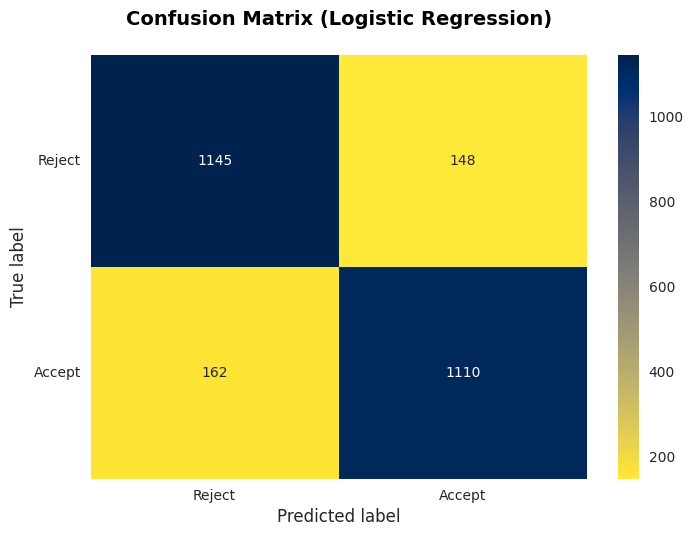

In [ ]:
# Plot the confusion matrix for the LR training model
confusion_matrix_lr = pd.DataFrame((confusion_matrix(y_train, y_train_pred_lr)), ('Reject', 'Accept'),
                                    ('Reject', 'Accept'))

plt.figure()
heatmap = sns.heatmap(confusion_matrix_lr, annot=True, annot_kws={'size': 10}, fmt='d', cmap='cividis_r')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=10)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='center', fontsize=10)

plt.title('Confusion Matrix (Logistic Regression)\n', fontsize=14, color='black', weight='bold')
plt.ylabel('True label', fontsize=12)
plt.xlabel('Predicted label', fontsize=12)
plt.show()

In [ ]:
# Evaluating model's overall performance metrics
lr_accuracy_train = accuracy_score(y_train, y_train_pred_lr)
lr_precision_train = precision_score(y_train, y_train_pred_lr)
lr_recall_train = recall_score(y_train, y_train_pred_lr)
lr_f1_train = f1_score(y_train, y_train_pred_lr)

print("Accuracy: %.2f%%" % (lr_accuracy_train * 100.0))
print("Precision: %.2f%%" % (lr_precision_train * 100.0))
print("Recall: %.2f%%" % (lr_recall_train * 100.0))
print("F1 Score: %.2f%%" % (lr_f1_train * 100.0))

Accuracy: 87.91%
Precision: 88.24%
Recall: 87.26%
F1 Score: 87.75%


In [ ]:
# Testing data using LR model
y_test_pred_lr = grid_search_lr.predict(X_test)

# Result for LR testing model
print(classification_report(y_test, y_test_pred_lr))

              precision    recall  f1-score   support

           0       0.83      0.89      0.86       417
           1       0.89      0.82      0.86       438

    accuracy                           0.86       855
   macro avg       0.86      0.86      0.86       855
weighted avg       0.86      0.86      0.86       855



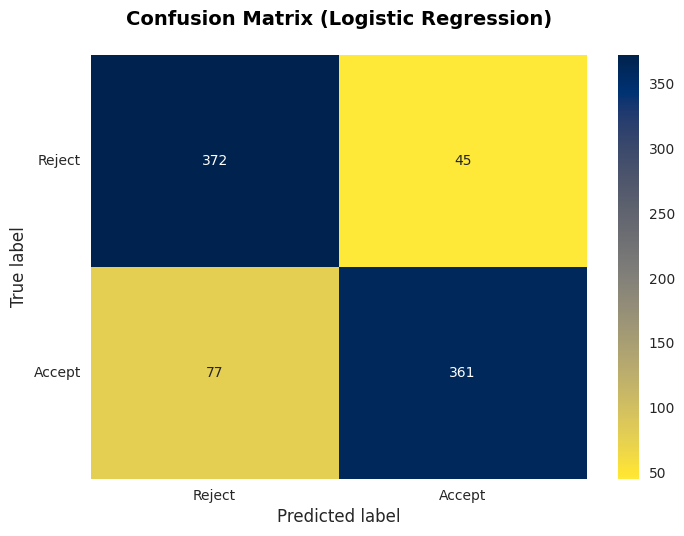

In [ ]:
# Plot the confusion matrix for the LR testing model
confusion_matrix_lr = pd.DataFrame((confusion_matrix(y_test, y_test_pred_lr)), ('Reject', 'Accept'),
                                    ('Reject', 'Accept'))

plt.figure()
heatmap = sns.heatmap(confusion_matrix_lr, annot=True, annot_kws={'size': 10}, fmt='d', cmap='cividis_r')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=10)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='center', fontsize=10)

plt.title('Confusion Matrix (Logistic Regression)\n', fontsize=14, color='black', weight='bold')
plt.ylabel('True label', fontsize=12)
plt.xlabel('Predicted label', fontsize=12)
plt.show()

In [ ]:
# Evaluating model's overall performance metrics
lr_accuracy_test = accuracy_score(y_test, y_test_pred_lr)
lr_precision_test = precision_score(y_test, y_test_pred_lr)
lr_recall_test = recall_score(y_test, y_test_pred_lr)
lr_f1_test = f1_score(y_test, y_test_pred_lr)

print("Accuracy: %.2f%%" % (lr_accuracy_test * 100.0))
print("Precision: %.2f%%" % (lr_precision_test * 100.0))
print("Recall: %.2f%%" % (lr_recall_test * 100.0))
print("F1 Score: %.2f%%" % (lr_f1_test * 100.0))

Accuracy: 85.73%
Precision: 88.92%
Recall: 82.42%
F1 Score: 85.55%


Logistic Regression Model Performance:
- The model generalizes well with only a ~2% drop in accuracy and F1 score between training and testing, which indicate that it is neither overfitting nor underfitting.
- Testing recall (82.42%) is slightly lower than training (87.26%), indicating the model may miss some positives in unseen data.

# 2. Decision Tree

In [ ]:
dt_model = DecisionTreeClassifier(random_state=42)

# Hyperparameter grid
dt_params = {
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Grid Search
dt_grid = GridSearchCV(dt_model, dt_params, cv=3, scoring='roc_auc', n_jobs=-1, verbose=2)

# Training data using DT model
dt_grid.fit(X_train, y_train)
best_dt = dt_grid.best_estimator_

y_train_pred_dt = best_dt.predict(X_train)

# Result for DT training model
print(classification_report(y_train, y_train_pred_dt))

Fitting 3 folds for each of 27 candidates, totalling 81 fits
              precision    recall  f1-score   support

           0       0.89      0.88      0.89      1293
           1       0.88      0.89      0.88      1272

    accuracy                           0.88      2565
   macro avg       0.89      0.89      0.88      2565
weighted avg       0.89      0.88      0.88      2565



In [ ]:
# Best hyperparameters from grid search
print("Best hyperparameters:")
print(dt_grid.best_params_)

Best hyperparameters:
{'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 10}


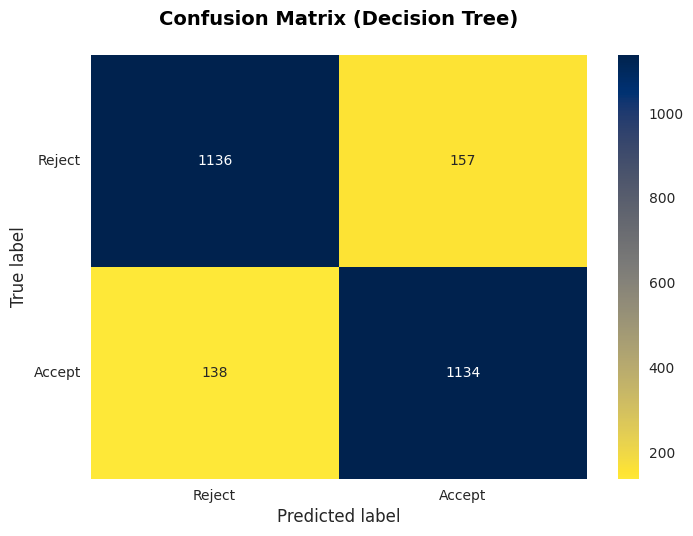

In [ ]:
# Plot the confusion matrix for the DT training model
confusion_matrix_dt = pd.DataFrame((confusion_matrix(y_train, y_train_pred_dt)), ('Reject', 'Accept'),
                                    ('Reject', 'Accept'))

plt.figure()
heatmap = sns.heatmap(confusion_matrix_dt, annot=True, annot_kws={'size': 10}, fmt='d', cmap='cividis_r')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=10)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='center', fontsize=10)

plt.title('Confusion Matrix (Decision Tree)\n', fontsize=14, color='black', weight='bold')
plt.ylabel('True label', fontsize=12)
plt.xlabel('Predicted label', fontsize=12)
plt.show()

In [ ]:
# Evaluating model's overall performance metrics
dt_accuracy_train = accuracy_score(y_train, y_train_pred_dt)
dt_precision_train = precision_score(y_train, y_train_pred_dt)
dt_recall_train = recall_score(y_train, y_train_pred_dt)
dt_f1_train = f1_score(y_train, y_train_pred_dt)

print("Accuracy: %.2f%%" % (dt_accuracy_train * 100.0))
print("Precision: %.2f%%" % (dt_precision_train * 100.0))
print("Recall: %.2f%%" % (dt_recall_train * 100.0))
print("F1 Score: %.2f%%" % (dt_f1_train * 100.0))

Accuracy: 88.50%
Precision: 87.84%
Recall: 89.15%
F1 Score: 88.49%


In [ ]:
# Testing data using DT model
y_test_pred_dt = best_dt.predict(X_test)

# Result for DT testing model
print(classification_report(y_test, y_test_pred_dt))

              precision    recall  f1-score   support

           0       0.86      0.90      0.88       417
           1       0.90      0.86      0.88       438

    accuracy                           0.88       855
   macro avg       0.88      0.88      0.88       855
weighted avg       0.88      0.88      0.88       855



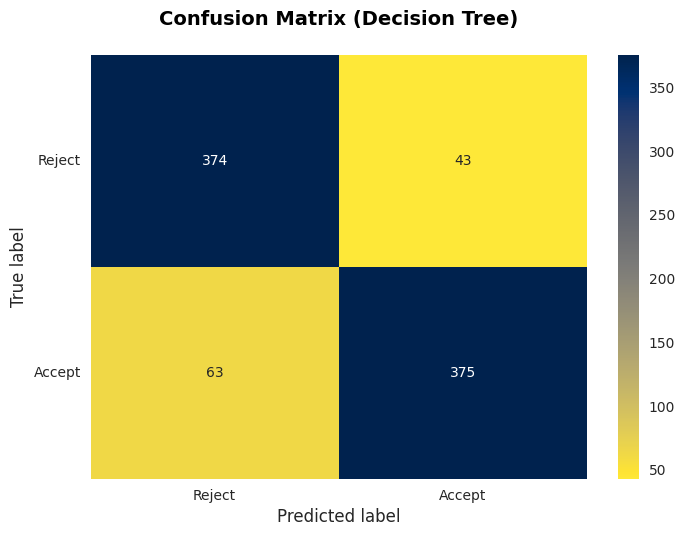

In [ ]:
# Plot the confusion matrix for the DT testing model
confusion_matrix_dt = pd.DataFrame((confusion_matrix(y_test, y_test_pred_dt)), ('Reject', 'Accept'),
                                    ('Reject', 'Accept'))

plt.figure()
heatmap = sns.heatmap(confusion_matrix_dt, annot=True, annot_kws={'size': 10}, fmt='d', cmap='cividis_r')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=10)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='center', fontsize=10)

plt.title('Confusion Matrix (Decision Tree)\n', fontsize=14, color='black', weight='bold')
plt.ylabel('True label', fontsize=12)
plt.xlabel('Predicted label', fontsize=12)
plt.show()

In [ ]:
# Evaluating model's overall performance metrics
dt_accuracy_test = accuracy_score(y_test, y_test_pred_dt)
dt_precision_test = precision_score(y_test, y_test_pred_dt)
dt_recall_test = recall_score(y_test, y_test_pred_dt)
dt_f1_test = f1_score(y_test, y_test_pred_dt)

print("Accuracy: %.2f%%" % (dt_accuracy_test * 100.0))
print("Precision: %.2f%%" % (dt_precision_test * 100.0))
print("Recall: %.2f%%" % (dt_recall_test * 100.0))
print("F1 Score: %.2f%%" % (dt_f1_test * 100.0))

Accuracy: 87.60%
Precision: 89.71%
Recall: 85.62%
F1 Score: 87.62%


Decision Tree Model Performance:
- Slight performance drop (~1%-2%) from training to testing shows good generalization, but trees are prone to overfitting with deeper structures.
- Higher precision than recall on the test set suggests the model is more conservative in predicting positives, which may lead to missed true positives.

# 3. Random Forest

In [ ]:
# Building Random Forest Model
rf_model = RandomForestClassifier(random_state=42)

# Hyperparameter grid
rf_params = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Grid Search
rf_grid = GridSearchCV(rf_model, rf_params, cv=3, scoring='roc_auc', n_jobs=-1, verbose=2)

# Training data using RF model
rf_grid.fit(X_train, y_train)
best_rf = rf_grid.best_estimator_

y_train_pred_rf = best_rf.predict(X_train)

# Result for RF training model
print(classification_report(y_train, y_train_pred_rf))

Fitting 3 folds for each of 16 candidates, totalling 48 fits
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1293
           1       1.00      1.00      1.00      1272

    accuracy                           1.00      2565
   macro avg       1.00      1.00      1.00      2565
weighted avg       1.00      1.00      1.00      2565



In [ ]:
# Best hyperparameters from grid search
print("Best hyperparameters:")
print(rf_grid.best_params_)

Best hyperparameters:
{'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


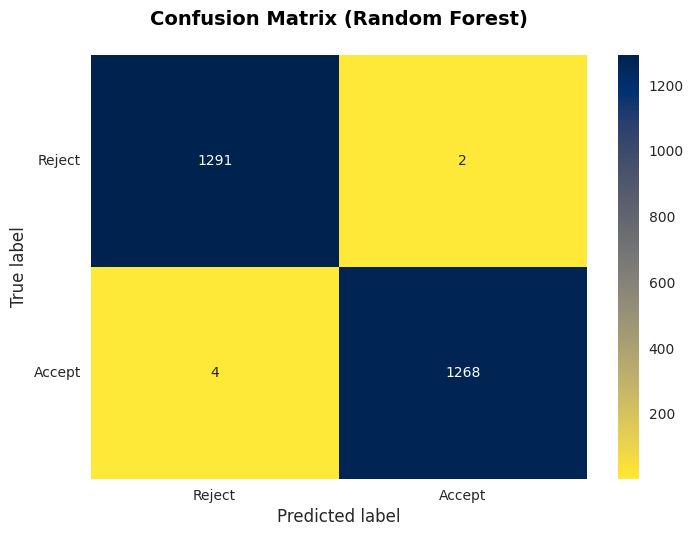

In [ ]:
# Plot the confusion matrix for the RF training model
confusion_matrix_rf = pd.DataFrame((confusion_matrix(y_train, y_train_pred_rf)), ('Reject', 'Accept'),
                                    ('Reject', 'Accept'))

plt.figure()
heatmap = sns.heatmap(confusion_matrix_rf, annot=True, annot_kws={'size': 10}, fmt='d', cmap='cividis_r')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=10)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='center', fontsize=10)

plt.title('Confusion Matrix (Random Forest)\n', fontsize=14, color='black', weight='bold')
plt.ylabel('True label', fontsize=12)
plt.xlabel('Predicted label', fontsize=12)
plt.show()

In [ ]:
# Evaluating model's overall performance metrics
rf_accuracy_train = accuracy_score(y_train, y_train_pred_rf)
rf_precision_train = precision_score(y_train, y_train_pred_rf)
rf_recall_train = recall_score(y_train, y_train_pred_rf)
rf_f1_train = f1_score(y_train, y_train_pred_rf)

print("Accuracy: %.2f%%" % (rf_accuracy_train * 100.0))
print("Precision: %.2f%%" % (rf_precision_train * 100.0))
print("Recall: %.2f%%" % (rf_recall_train * 100.0))
print("F1 Score: %.2f%%" % (rf_f1_train * 100.0))

Accuracy: 99.77%
Precision: 99.84%
Recall: 99.69%
F1 Score: 99.76%


In [ ]:
# Testing data using RF model
y_test_pred_rf = best_rf.predict(X_test)

# Result for RF testing model
print(classification_report(y_test, y_test_pred_rf))

              precision    recall  f1-score   support

           0       0.95      0.96      0.95       417
           1       0.96      0.95      0.96       438

    accuracy                           0.95       855
   macro avg       0.95      0.95      0.95       855
weighted avg       0.95      0.95      0.95       855



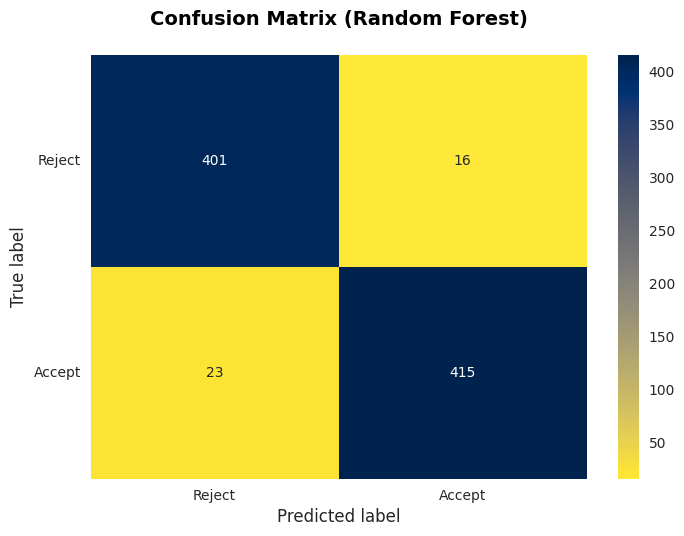

In [ ]:
# Plot the confusion matrix for the RF testing model
confusion_matrix_rf = pd.DataFrame((confusion_matrix(y_test, y_test_pred_rf)), ('Reject', 'Accept'),
                                    ('Reject', 'Accept'))

plt.figure()
heatmap = sns.heatmap(confusion_matrix_rf, annot=True, annot_kws={'size': 10}, fmt='d', cmap='cividis_r')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=10)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='center', fontsize=10)

plt.title('Confusion Matrix (Random Forest)\n', fontsize=14, color='black', weight='bold')
plt.ylabel('True label', fontsize=12)
plt.xlabel('Predicted label', fontsize=12)
plt.show()

In [ ]:
# Evaluating model's overall performance metrics
rf_accuracy_test = accuracy_score(y_test, y_test_pred_rf)
rf_precision_test = precision_score(y_test, y_test_pred_rf)
rf_recall_test = recall_score(y_test, y_test_pred_rf)
rf_f1_test = f1_score(y_test, y_test_pred_rf)

print("Accuracy: %.2f%%" % (rf_accuracy_test * 100.0))
print("Precision: %.2f%%" % (rf_precision_test * 100.0))
print("Recall: %.2f%%" % (rf_recall_test * 100.0))
print("F1 Score: %.2f%%" % (rf_f1_test * 100.0))

Accuracy: 95.44%
Precision: 96.29%
Recall: 94.75%
F1 Score: 95.51%


Random Forest Model Performance:
- Significant gap between training (99.76% F1) and testing (95.51% F1) indicates slight overfitting, though still excellent generalization overall.
- Extremely high performance shows Random Forest effectively captures complex patterns while maintaining robustness across datasets.

**Features Importance**

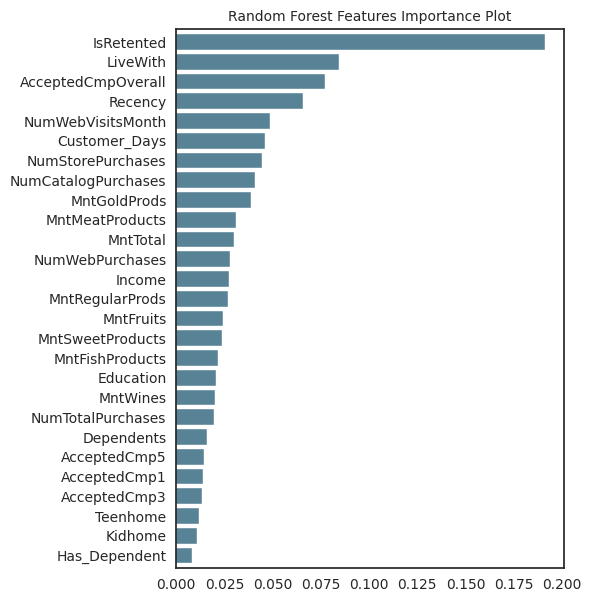

In [ ]:
importances_rf = pd.Series(best_rf.feature_importances_, index=X.columns).sort_values(ascending=True)

sns.set_style('white')
plt.figure(figsize=(5,7))
fig = importances_rf.plot(kind ='barh', color='#588396ff', width=0.8)
plt.title('Random Forest Features Importance Plot', fontsize=10)
plt.show()

fig.figure.tight_layout()

# 4. XGBoost

In [ ]:
# Building XGBoost Model
xgb_model = XGBClassifier(random_state=42)

# Hyperparameter grid
xgb_params = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2]
}

# Grid Search
xgb_grid = GridSearchCV(xgb_model, xgb_params, cv=3, scoring='roc_auc', n_jobs=-1, verbose=2)

# Training data using XGB model
xgb_grid.fit(X_train, y_train)
best_xgb = xgb_grid.best_estimator_

y_train_pred_xgb = best_xgb.predict(X_train)

# Result for XGB training model
print(classification_report(y_train, y_train_pred_xgb))

Fitting 3 folds for each of 27 candidates, totalling 81 fits
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1293
           1       1.00      1.00      1.00      1272

    accuracy                           1.00      2565
   macro avg       1.00      1.00      1.00      2565
weighted avg       1.00      1.00      1.00      2565



In [ ]:
# Best hyperparameters from grid search
print("Best hyperparameters:")
print(xgb_grid.best_params_)

Best hyperparameters:
{'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 100}


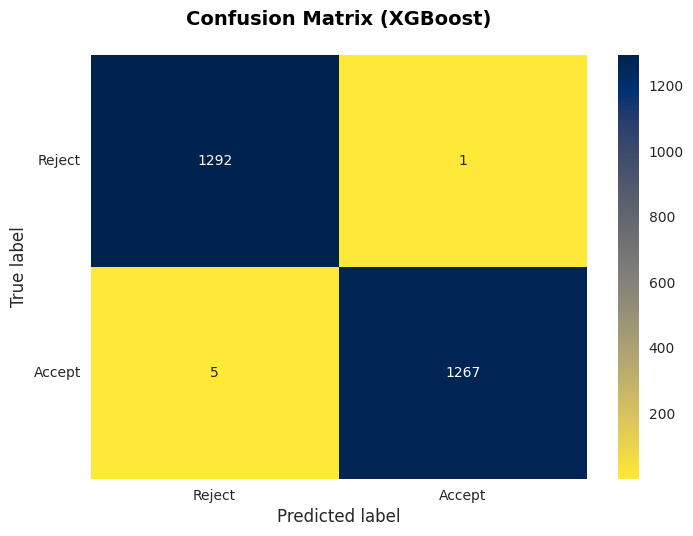

In [ ]:
# Plot the confusion matrix for the XGB training model
confusion_matrix_xgb = pd.DataFrame((confusion_matrix(y_train, y_train_pred_xgb)), ('Reject', 'Accept'),
                                    ('Reject', 'Accept'))

plt.figure()
heatmap = sns.heatmap(confusion_matrix_xgb, annot=True, annot_kws={'size': 10}, fmt='d', cmap='cividis_r')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=10)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='center', fontsize=10)

plt.title('Confusion Matrix (XGBoost)\n', fontsize=14, color='black', weight='bold')
plt.ylabel('True label', fontsize=12)
plt.xlabel('Predicted label', fontsize=12)
plt.show()

In [ ]:
# Evaluating model's overall performance metrics
xgb_accuracy_train = accuracy_score(y_train, y_train_pred_xgb)
xgb_precision_train = precision_score(y_train, y_train_pred_xgb)
xgb_recall_train = recall_score(y_train, y_train_pred_xgb)
xgb_f1_train = f1_score(y_train, y_train_pred_xgb)

print("Accuracy: %.2f%%" % (xgb_accuracy_train * 100.0))
print("Precision: %.2f%%" % (xgb_precision_train * 100.0))
print("Recall: %.2f%%" % (xgb_recall_train * 100.0))
print("F1 Score: %.2f%%" % (xgb_f1_train * 100.0))

Accuracy: 99.77%
Precision: 99.92%
Recall: 99.61%
F1 Score: 99.76%


In [ ]:
y_test_pred_xgb = best_xgb.predict(X_test)

# Result for XGB testing model
print(classification_report(y_test, y_test_pred_xgb))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96       417
           1       0.96      0.96      0.96       438

    accuracy                           0.96       855
   macro avg       0.96      0.96      0.96       855
weighted avg       0.96      0.96      0.96       855



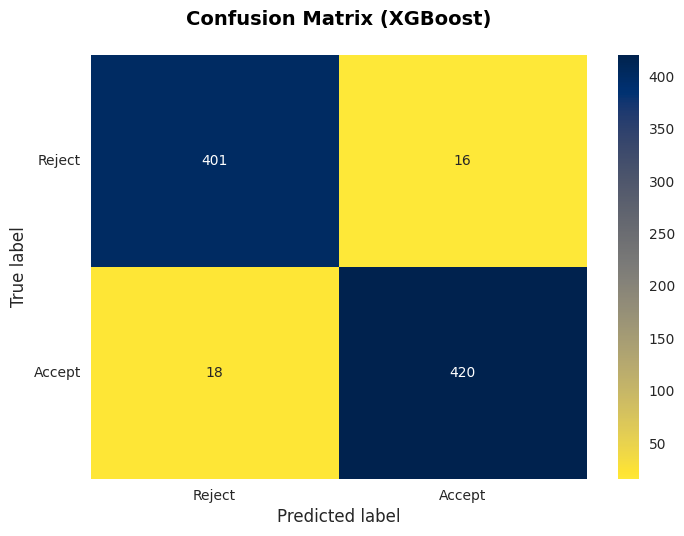

In [ ]:
# Plot the confusion matrix for the XGB testing model
confusion_matrix_xgb = pd.DataFrame((confusion_matrix(y_test, y_test_pred_xgb)), ('Reject', 'Accept'),
                                    ('Reject', 'Accept'))

plt.figure()
heatmap = sns.heatmap(confusion_matrix_xgb, annot=True, annot_kws={'size': 10}, fmt='d', cmap='cividis_r')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=10)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='center', fontsize=10)

plt.title('Confusion Matrix (XGBoost)\n', fontsize=14, color='black', weight='bold')
plt.ylabel('True label', fontsize=12)
plt.xlabel('Predicted label', fontsize=12)
plt.show()

In [ ]:
# Evaluating model's overall performance metrics
xgb_accuracy_test = accuracy_score(y_test, y_test_pred_xgb)
xgb_precision_test = precision_score(y_test, y_test_pred_xgb)
xgb_recall_test = recall_score(y_test, y_test_pred_xgb)
xgb_f1_test = f1_score(y_test, y_test_pred_xgb)

print("Accuracy: %.2f%%" % (xgb_accuracy_test * 100.0))
print("Precision: %.2f%%" % (xgb_precision_test * 100.0))
print("Recall: %.2f%%" % (xgb_recall_test * 100.0))
print("F1 Score: %.2f%%" % (xgb_f1_test * 100.0))

Accuracy: 96.02%
Precision: 96.33%
Recall: 95.89%
F1 Score: 96.11%


XGBoost Model Performance:
- High training and testing scores with minimal drop indicate excellent model generalization and low variance.
- Balanced precision and recall show XGBoost handles both false positives and false negatives effectively, making it well-suited for deployment.

**Features Importance**

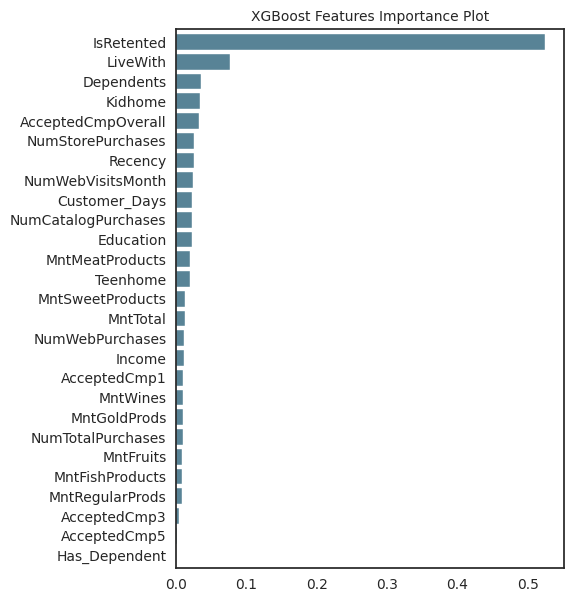

In [ ]:
importances_xgb = pd.Series(best_xgb.feature_importances_, index=X.columns).sort_values(ascending=True)

sns.set_style('white')
plt.figure(figsize=(5,7))
fig = importances_xgb.plot(kind ='barh', color='#588396ff', width=0.8)
plt.title('XGBoost Features Importance Plot', fontsize=10)
plt.show()

fig.figure.tight_layout()

# 5. K-Nearest Neighbor

In [ ]:
# Building K-Nearest Neighbors Model
knn_model = KNeighborsClassifier()

# Hyperparameter grid
knn_params = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski'],
    'p': [1, 2]
}

# Grid Search
knn_grid = GridSearchCV(knn_model, knn_params, cv=3, scoring='roc_auc', n_jobs=-1, verbose=2)

# Training data using KNN model
knn_grid.fit(X_train, y_train)
best_knn = knn_grid.best_estimator_

y_train_pred_knn = best_knn.predict(X_train)

# Result for KNN training model
print(classification_report(y_train, y_train_pred_knn))

Fitting 3 folds for each of 60 candidates, totalling 180 fits
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1293
           1       1.00      1.00      1.00      1272

    accuracy                           1.00      2565
   macro avg       1.00      1.00      1.00      2565
weighted avg       1.00      1.00      1.00      2565



In [ ]:
# Best hyperparameters from grid search
print("Best hyperparameters:")
print(knn_grid.best_params_)

Best hyperparameters:
{'metric': 'manhattan', 'n_neighbors': 7, 'p': 1, 'weights': 'distance'}


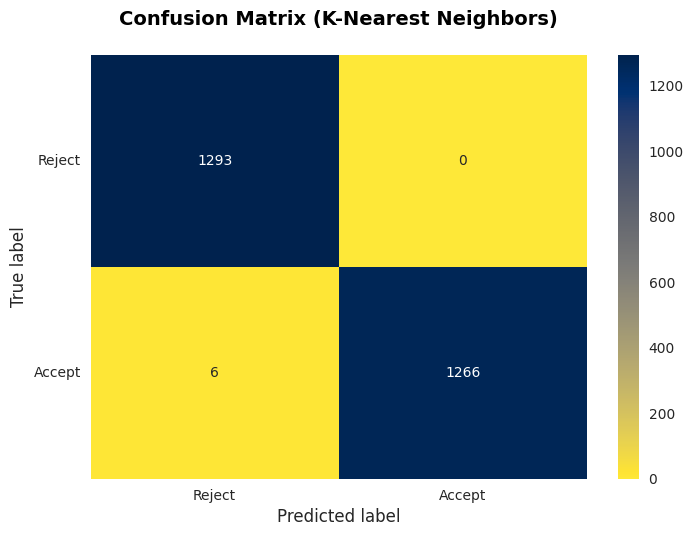

In [ ]:
# Plot the confusion matrix for the KNN training model
confusion_matrix_knn = pd.DataFrame((confusion_matrix(y_train, y_train_pred_knn)), ('Reject', 'Accept'),
                                    ('Reject', 'Accept'))

plt.figure()
heatmap = sns.heatmap(confusion_matrix_knn, annot=True, annot_kws={'size': 10}, fmt='d', cmap='cividis_r')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=10)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='center', fontsize=10)

plt.title('Confusion Matrix (K-Nearest Neighbors)\n', fontsize=14, color='black', weight='bold')
plt.ylabel('True label', fontsize=12)
plt.xlabel('Predicted label', fontsize=12)
plt.show()

In [ ]:
# Evaluating model's overall performance metrics
knn_accuracy_train = accuracy_score(y_train, y_train_pred_knn)
knn_precision_train = precision_score(y_train, y_train_pred_knn)
knn_recall_train = recall_score(y_train, y_train_pred_knn)
knn_f1_train = f1_score(y_train, y_train_pred_knn)

print("Accuracy: %.2f%%" % (knn_accuracy_train * 100.0))
print("Precision: %.2f%%" % (knn_precision_train * 100.0))
print("Recall: %.2f%%" % (knn_recall_train * 100.0))
print("F1 Score: %.2f%%" % (knn_f1_train * 100.0))

Accuracy: 99.77%
Precision: 100.00%
Recall: 99.53%
F1 Score: 99.76%


In [ ]:
# Testing data using KNN model
y_test_pred_knn = best_knn.predict(X_test)

# Result for KNN testing model
print(classification_report(y_test, y_test_pred_knn))

              precision    recall  f1-score   support

           0       0.98      0.85      0.91       417
           1       0.87      0.98      0.92       438

    accuracy                           0.92       855
   macro avg       0.93      0.92      0.92       855
weighted avg       0.92      0.92      0.92       855



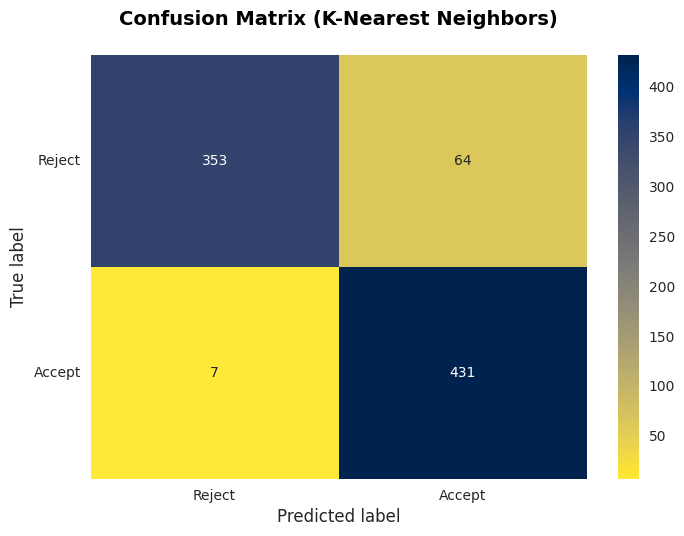

In [ ]:
# Plot the confusion matrix for the KNN testing model
confusion_matrix_knn = pd.DataFrame((confusion_matrix(y_test, y_test_pred_knn)), ('Reject', 'Accept'),
                                    ('Reject', 'Accept'))

plt.figure()
heatmap = sns.heatmap(confusion_matrix_knn, annot=True, annot_kws={'size': 10}, fmt='d', cmap='cividis_r')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=10)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='center', fontsize=10)

plt.title('Confusion Matrix (K-Nearest Neighbors)\n', fontsize=14, color='black', weight='bold')
plt.ylabel('True label', fontsize=12)
plt.xlabel('Predicted label', fontsize=12)
plt.show()

In [ ]:
# Evaluating model's overall performance metrics
knn_accuracy_test = accuracy_score(y_test, y_test_pred_knn)
knn_precision_test = precision_score(y_test, y_test_pred_knn)
knn_recall_test = recall_score(y_test, y_test_pred_knn)
knn_f1_test = f1_score(y_test, y_test_pred_knn)

print("Accuracy: %.2f%%" % (knn_accuracy_test * 100.0))
print("Precision: %.2f%%" % (knn_precision_test * 100.0))
print("Recall: %.2f%%" % (knn_recall_test * 100.0))
print("F1 Score: %.2f%%" % (knn_f1_test * 100.0))

Accuracy: 91.70%
Precision: 87.07%
Recall: 98.40%
F1 Score: 92.39%


K-Nearest Neighbor Model Performance:
- Large drop from training (100% precision) to testing (87.07%) suggests the model is overfitting, memorizing the training data rather than learning general patterns.
- High recall on test data (98.40%) means KNN is very sensitive, but it comes at the cost of increased false positives (low precision).

# **Best ML Model Selection**

In [ ]:
# Comparing and sorting model performance based on training and testing accuracy, to highlight the top-performing models
results = pd.DataFrame([["Logistic Regression", lr_accuracy_train, lr_accuracy_test],
                        ["Decision Tree", dt_accuracy_train, dt_accuracy_test],
                        ["Random Forest", rf_accuracy_train, rf_accuracy_test],
                        ["XGBoost", xgb_accuracy_train, xgb_accuracy_test],
                        ["K-Nearest Neighbor", knn_accuracy_train, knn_accuracy_test]],
                        columns = ["Model", "Training Accuracy Score", "Testing Accuracy Score"])

results.sort_values(by=['Training Accuracy Score', 'Testing Accuracy Score'], ascending=False).style.background_gradient(cmap='Blues')

- All top 3 models show signs of potential overfitting which can be seen above. The XGBoost, Random Forest, and K-Nearest Neighbor all have identical very high training accuracy (99.77%), but show a notable drop in testing accuracy and especially KNN (91.70%), indicating overfitting and lower generalization.
- XGBoost is the best-performing and most balanced model. Despite the high training accuracy, XGBoost maintains the highest testing accuracy (96.02%), indicating strong generalization and making it the most reliable model for unseen data in this context.

In [ ]:
# Comparing and sorting model performance on the testing set using Accuracy, Precision, Recall, and F1-Score
results = pd.DataFrame([['Logistic Regression', lr_accuracy_test, lr_precision_test, lr_recall_test, lr_f1_test],
        ['Decision Tree', dt_accuracy_test, dt_precision_test, dt_recall_test, dt_f1_test],
        ['Random Forest', rf_accuracy_test, rf_precision_test, rf_recall_test, rf_f1_test],
        ['XGBoost', xgb_accuracy_test, xgb_precision_test, xgb_recall_test, xgb_f1_test],
        ['K-Nearest Neighbors', knn_accuracy_test, knn_precision_test, knn_recall_test, knn_f1_test]],
        columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1_Score'])

results.sort_values(by=['Accuracy', 'Precision', 'Recall', 'F1_Score'], ascending=False).style.background_gradient(cmap='Blues')

- XGBoost consistently outperforms all other models across 3 evaluation metrics. This model achieves the highest Accuracy (96.02%), Precision (96.33%), and F1-Score (96.11%), also pretty much high at Recall (95.89%) indicating it has both high correctness and balance between false positives and false negatives.
- K-Nearest Neighbors has high recall but at the cost of precision. Although KNN has the highest Recall (98.40%), its Precision is lowest (87.07%), indicating that it frequently misclassifies negatives as positives. This makes it less reliable in scenarios where false positives are costly.

# **Import Model for Deploying**

In [ ]:
import joblib

joblib.dump(best_xgb, 'xg_boost_model.pkl')

['xg_boost_model.pkl']

In [ ]:
importances_xgb

Has_Dependent          0.000000
AcceptedCmp5           0.001071
AcceptedCmp3           0.004450
MntRegularProds        0.008262
MntFishProducts        0.008639
MntFruits              0.008728
NumTotalPurchases      0.009489
MntGoldProds           0.009721
MntWines               0.009765
AcceptedCmp1           0.009846
Income                 0.010586
NumWebPurchases        0.011360
MntTotal               0.012102
MntSweetProducts       0.012537
Teenhome               0.019544
MntMeatProducts        0.019546
Education              0.021948
NumCatalogPurchases    0.022205
Customer_Days          0.023082
NumWebVisitsMonth      0.024079
Recency                0.024857
NumStorePurchases      0.025173
AcceptedCmpOverall     0.031877
Kidhome                0.033829
Dependents             0.035247
LiveWith               0.076931
IsRetented             0.525128
dtype: float32

List of Important Feature:   
**Customer Profiles**:
- `LiveWith`: 1 if customer is still married or together, 0 otherwise(widow, divorced, single)
- `Education` : 1 if customer has degree, 0 otherwise
- `Income`: Customer's yearly household income
- `Kidhome`: Number of children in customer's household
- `Teenhome`: Number of teenagers in customer's household
- `Customer_Days`: Number of days since registration as a customer
- `Recency`: Number of days since customer's last purchase
- `Dependents`: Number of dependents customer's having
- `Has_Dependent`: 1 if customer has at least 1 dependent or more, 0 otherwise

**Product Preferences**:
- `MntWines`: Amount spent on wine in the last 2 years
- `MntFruits`: Amount spent on fruits in the last 2 years
- `MntMeatProducts`: Amount spent on meat in the last 2 years
- `MntFishProducts`: Amount spent on fish in the last 2 years
- `MntSweetProducts`: Amount spent on sweets in the last 2 years
- `MntRegularProds`: Amount spent on regular in the last 2 years
- `MntGoldProds`: Amount spent on gold in the last 2 years
- `MntTotal`: Total amount spent on all the products

**Campaigns(Success or Failure)**:
- `AcceptedCmp1`: 1 if customer accepted the offer in the 1st campaign, 0 otherwise
-`AcceptedCmp3`: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
- `AcceptedCmp5`: 1 if customer accepted the offer in the 5th campaign, 0 otherwise
- `AcceptedCmpOverall`: Overall accepted campaign by customer (max is 3)
- `IsRetented`: 1 if AcceptedCmpOverall > 1, 0 otherwise

**Channel Performance(Online or Offline)**:
- `NumWebPurchases`: Number of purchases made through the company's web site
- `NumCatalogPurchases`: Number of purchases made using a catalogue
- `NumStorePurchases`: Number of purchases made directly in stores
- `NumWebVisitsMonth`: Number of visits to company's web site in the last month
- `NumTotalPurchases`: Total number of purchases product through every channel

**Target**:
- `Response`: 1 if customer accepted the offer in the last campaign, 0 otherwise

# **Business Recommendation**

1. Review and replicate the approach used in Campaign 4. Look at what made it **successful like messaging, timing, audience delivered** and use those insights to refine future campaigns. Underperforming campaigns like Campaign 2 should either be redesigned or dropped.

2. Double down on **targeting customers who've purchased recently and spend more**. These customers show the highest responsiveness to campaigns and offer the best return on marketing efforts.

3. Re-engage high-potential but inactive customers in Cluster 1. These are previously valuable customers who've gone quiet. **A personalized win-back campaign or exclusive incentive** may help bring them back.

4. Nurture newer users in Cluster 2 with **educational content and onboarding campaigns**. Help them discover more of the **product range, build trust, and guide them** toward their next purchase.

5. Introduce a **loyalty program focused on Core Champions (Cluster 3)**. These are the top customers and by offering them exclusive benefits, early access, or tailored rewards can help maintain their loyalty.

6. Investigate the **high bounce or hesitation behavior among lower-spending customers**. Improve the user experience on the website, simplify purchase flows, and test different value messages to reduce friction and encourage conversions.

7. Tailor offers based on family responsibilities. For example, customers with no dependents may **respond better to premium offers**, while those with dependents might prefer **practical bundles or savings-driven deals**.

8. **Segment campaign messaging based on income and education profiles**. Promote premium products like wine to higher-income customers, while highlighting affordable value for more budget-conscious segments.

9. **Refresh campaign strategies to combat engagement fatigue**. If campaign responses are declining over time, consider rotating themes, channels, or offer types to keep them feeling fresh and relevant.

10. Make segmentation part of the regular campaign planning. **Don't send the same message** to everyone and change it into more like design offers and timing based on behavior, not just demographics, to increase relevance and effectiveness.